# Instantiation

In [ ]:
import geopandas
import pandas
import starepandas
import matplotlib.pyplot as plt
from shapely.wkt import loads

## Points

### Creating a naive dataframe

In [2]:
cities = ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas']
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela']
latitudes = [-34.58, -15.78, -33.45, 4.60, 10.48]
longitudes = [-58.66, -47.91, -70.66, -74.08, -66.86]
data =  {'City': cities,  'Country': countries, 
         'Latitude': latitudes, 'Longitude': longitudes}

df = pandas.DataFrame(data)

### Creating a geodataframe

In [3]:
geom = geopandas.points_from_xy(df.Longitude, df.Latitude)
gdf = geopandas.GeoDataFrame(df, geometry=geom)
gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


### Creating sids

In [4]:
# Those are all identical
sids = starepandas.sids_from_xy(df.Longitude, df.Latitude, level=5)
sids = starepandas.sids_from_xy_df(gdf, num_workers=2, level=5)
#sids = starepandas.sids_from_gdf(gdf, level=5)

sdf = starepandas.STAREDataFrame(gdf)
sdf.set_sids(sids, inplace=True)

In [5]:
sdf

,City,Country,Latitude,Longitude,geometry,tids
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000),2663379193440875365
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000),2867415364672350629
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000),2723774768829278533
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000),2667981979956219493
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000),2494081632617553381


In [5]:
trixels = sdf.make_trixels()
sdf.set_trixels(trixels, inplace=True)

In [6]:
sdf.sids

0    2663379193440875365
1    2867415364672350629
2    2723774768829278533
3    2667981979956219493
4    2494081632617553381
Name: sids, dtype: int64

In [7]:
sdf.geometry

0    POINT (-58.66000 -34.58000)
1    POINT (-47.91000 -15.78000)
2    POINT (-70.66000 -33.45000)
3      POINT (-74.08000 4.60000)
4     POINT (-66.86000 10.48000)
Name: geometry, dtype: geometry

In [8]:
sdf

,City,Country,Latitude,Longitude,geometry,sids,trixels
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000),2663379193440875365,"POLYGON ((-59.87026 -34.71551, -56.40359 -35.1..."
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000),2867415364672350629,"POLYGON ((-49.47476 -12.22984, -51.65012 -15.8..."
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000),2723774768829278533,"POLYGON ((-71.62565 -35.43810, -69.94333 -32.7..."
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000),2667981979956219493,"POLYGON ((-75.23698 2.57332, -73.80858 5.00265..."
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000),2494081632617553381,"POLYGON ((-67.79536 8.98813, -66.27210 11.3867..."


## Some plotting

<AxesSubplot:>

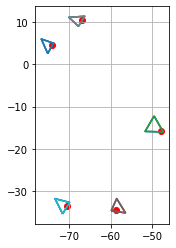

In [9]:
fig, ax = plt.subplots()
ax.grid(True)

sdf.plot(ax=ax)
sdf.plot(ax=ax, trixels=True)
sdf.plot(ax=ax, trixels=False, color='r')

sdf.plot(ax=ax, column='City')

## From granule

### Bootstrap

In [10]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
modis = starepandas.read_granule(fname, 
                                 add_sids=True,
                                 adapt_resolution=True)

### Use Sidecar

In [11]:
modis = starepandas.read_granule(fname, sidecar=True)
modis

,sids,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared
0,4298473764500464809,8.493984e+08,147.089997,-22.959999,65.339999,-89.519998,NaN
1,4298458168380511209,8.493984e+08,146.999997,-23.539999,64.719999,-89.799998,NaN
2,4297394569014717897,8.493984e+08,146.919997,-24.099999,64.109999,-90.079998,NaN
3,4297300698872999369,8.493984e+08,146.839997,-24.639999,63.509999,-90.339998,NaN
4,4297290857922121161,8.493984e+08,146.759997,-25.159999,62.909999,-90.589998,NaN
...,...,...,...,...,...,...,...
109615,3727686638370615689,8.493987e+08,121.569997,-74.679998,62.229999,47.999999,NaN
109616,3727661374545790857,8.493987e+08,121.469997,-75.049998,62.819999,47.719999,NaN
109617,3727838256925064969,8.493987e+08,121.369997,-75.439998,63.419999,47.429999,NaN
109618,3727843063731949801,8.493987e+08,121.259997,-75.829998,64.019999,47.139999,NaN


## Polygons

### US State

In [12]:
us = geopandas.read_file('../tests/data/tl_2017_us_state.gpkg')
us = us.to_crs('EPSG:4326')
us['geom_simple'] = us.simplify(0.002)
us.set_geometry('geom_simple', inplace=True)

In [13]:
stare = starepandas.sids_from_gdf(us, level=7, force_ccw=True)
us = starepandas.STAREDataFrame(us, sids=stare)
us.add_trixels(inplace=True)
us._geometry_column_name

'geom_simple'

<AxesSubplot:>

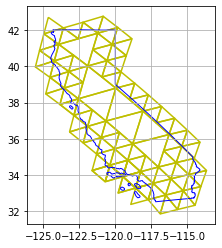

In [14]:
fig, ax = plt.subplots()
ax.grid(True)

state = us[us.NAME=='California']
state.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=0)
state.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)

### Africa

In [ ]:

# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = {
  'pop_est': [ 58005463.0, 603253.0, 86790567.0, 10192317.3, 52573973.0, 
  42813238.0, 15946876.0, 58558270.0, 2125268.0, 14645468.0, 
  2303697.0, 2494530.0, 16296364.0, 19658031.0, 4525696.0, 
  11801151.0, 23310715.0, 200963599.0, 25876380.0, 8082366.0, 
  30417856.0, 25716544.0, 12771246.0, 1920922.0, 4937374.0, 
  7813215.0, 20321378.0, 4745185.0, 5380508.0, 2172579.0, 
  1355986.0, 17861030.0, 18628747.0, 30366036.0, 1148130.0, 
  31825295.0, 11530580.0, 26969307.0, 2347706.0, 11694719.0, 
  43053054.0, 6081196.0, 36471769.0, 100388073.0, 6777452.0, 
  112078730.0, 973560.0, 5096159.0, 44269594.0, 12626950.0, 
  11062113.0,
  ],
  'continent': [ 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 
  'Africa',
  ],
  'name': [
 'Tanzania', 'W. Sahara', 'Dem. Rep. Congo', 'Somalia', 'Kenya', 
 'Sudan', 'Chad', 'South Africa', 'Lesotho', 'Zimbabwe', 
 'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 
 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 
 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Liberia', 
 'Sierra Leone', 'Burkina Faso', 'Central African Rep.', 'Congo', 'Gabon', 
 'Eq. Guinea', 'Zambia', 'Malawi', 'Mozambique', 'eSwatini', 
 'Angola', 'Burundi', 'Madagascar', 'Gambia', 'Tunisia', 
 'Algeria', 'Eritrea', 'Morocco', 'Egypt', 'Libya', 
 'Ethiopia', 'Djibouti', 'Somaliland', 'Uganda', 'Rwanda', 
 'S. Sudan',
  ],
  'iso_a3': [ 'TZA', 'ESH', 'COD', 'SOM', 'KEN', 
  'SDN', 'TCD', 'ZAF', 'LSO', 'ZWE', 
  'BWA', 'NAM', 'SEN', 'MLI', 'MRT', 
  'BEN', 'NER', 'NGA', 'CMR', 'TGO', 
  'GHA', 'CIV', 'GIN', 'GNB', 'LBR', 
  'SLE', 'BFA', 'CAF', 'COG', 'GAB', 
  'GNQ', 'ZMB', 'MWI', 'MOZ', 'SWZ', 
  'AGO', 'BDI', 'MDG', 'GMB', 'TUN', 
  'DZA', 'ERI', 'MAR', 'EGY', 'LBY', 
  'ETH', 'DJI', 'SOL', 'UGA', 'RWA', 
  'SSD',
  ],
  'gdp_md_est': [ 63177, 907, 50400, 4719, 95503, 
  30513, 11314, 351431, 2376, 21440, 
  18340, 12366, 23578, 17279, 7600, 
  14390, 12911, 448120, 39007, 5490, 
  66983, 58539, 12296, 1339, 3070, 
  4121, 15990, 2220, 12267, 16874, 
  11026, 23309, 7666, 15291, 4471, 
  88815, 3012, 14114, 1826, 38796, 
  171091, 2065, 119700, 303092, 52091, 
  95912, 3324, 17836, 35165, 10354, 
  11998,
  ],
  'geometry': [
"POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.059819999999945, 37.69868999999994 -3.096989999999948, 37.7669 -3.67712, 39.20222 -4.67677, 38.74053999999995 -5.908949999999948, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.007809999999949, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.09840000000003, 40.31658622911085 -10.31709775281749, 40.31659000000002 -10.31709999999987, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.28520232508166, 37.82763999999997 -11.26878999999991, 37.47128999999995 -11.56876, 36.77515099462281 -11.59453744878081, 36.51408165868426 -11.72093800216673, 35.31239790216904 -11.43914641687915, 34.55998904799935 -11.52002003341592, 34.27999999999997 -10.16000000000003, 33.94083772409653 -9.693673841980285, 33.73972000000009 -9.417149999999992, 32.75937544122132 -9.23059905358906, 32.19186486179194 -8.930358981973257, 31.5563480974665 -8.762048841998642, 31.15775133695005 -8.594578747317366, 30.7400097314221 -8.340005930353721, 30.74001549655179 -8.340007419470915, 30.1999967791017 -7.079980970898163, 29.62003217949001 -6.520015150583426, 29.41999271008817 -5.939998874539434, 29.51998660657293 -5.419978936386315, 29.33999759290035 -4.499983412294092, 29.75351240409987 -4.452389418153302, 30.11632000000003 -4.090120000000013, 30.50554 -3.56857999999994, 30.75224000000009 -3.359309999999994, 30.74301000000003 -3.034309999999948, 30.52766000000003 -2.807619999999986, 30.46967364576122 -2.41385475710134, 30.46967000000001 -2.413829999999962, 30.75830895358311 -2.287250257988369, 30.81613488131771 -1.698914076345389, 30.41910485201925 -1.134659112150416, 30.76986000000011 -1.014549999999986, 31.86617000000007 -1.027359999999931, 33.90371119710453 -0.9500000000000001))",
"POLYGON ((-8.665589565454809 27.65642588959236, -8.665124477564191 27.58947907155823, -8.684399786809053 27.39574412689601, -8.6872936670174 25.88105621998891, -11.96941891117116 25.93335276946827, -11.93722449385332 23.37459422453617, -12.87422156416958 23.28483226164518, -13.11875444177471 22.77122020109626, -12.92910193526353 21.32707062426756, -16.84519365077399 21.33332347257488, -17.06342322434257 20.99975210213083, -17.02042843267577 21.42231028898158, -17.00296179856109 21.42073415779658, -14.75095455571353 21.50060008390366, -14.63083268885107 21.8609398462749, -14.22116777185725 22.31016307218816, -13.89111039880905 23.6910090194593, -12.50096269372537 24.7701162785782, -12.03075883630163 26.03086619720307, -11.71821977380036 26.10409170176062, -11.39255489749701 26.88342397715439, -10.55126257978527 26.99080760345689, -10.18942420087758 26.86094472910741, -9.735343390328879 26.86094472910741, -9.41303748212448 27.08847606048857, -8.794883999049077 27.12069631602251, -8.817828334986672 27.65642588959236, -8.665589565454809 27.65642588959236))",
"POLYGON ((29.33999759290035 -4.499983412294092, 29.51998660657293 -5.419978936386315, 29.41999271008817 -5.939998874539434, 29.62003217949001 -6.520015150583426, 30.1999967791017 -7.079980970898163, 30.74001549655179 -8.340007419470915, 30.7400097314221 -8.340005930353721, 30.34608605319082 -8.238256524288218, 29.00291222506047 -8.407031752153472, 28.7348665707625 -8.526559340044578, 28.44987104667283 -9.164918308146085, 28.67368167492893 -9.605924981324932, 28.49606977714177 -10.78988372156405, 28.37225304537043 -11.79364674240139, 28.64241743339235 -11.97156869878232, 29.34154788586909 -12.36074391037241, 29.61600141777123 -12.17889454513731, 29.69961388521949 -13.25722665777183, 28.93428592297684 -13.24895842860514, 28.52356163912103 -12.69860442469668, 28.15510867687999 -12.2724805640179, 27.38879886242378 -12.13274749110067, 27.16441979341246 -11.60874846766107, 26.55308759939962 -11.92443979253213, 25.75230960460473 -11.78496510177636, 25.4181181169732 -11.33093596765996, 24.78316979340295 -11.23869353601896, 24.31451622894795 -11.26282642989927, 24.25715538910399 -10.95199268966366, 23.91221520355572 -10.92682626713751, 23.45679080576744 -10.86786345789248, 22.83734541188474 -11.01762175867433, 22.40279829274237 -10.99307545333569, 22.15526818206431 -11.08480112065377, 22.2087532894864 -9.894796237836509, 21.87518191904235 -9.523707777548566, 21.8018013851879 -8.908706556842979, 21.94913089365204 -8.305900974158277, 21.74645592620331 -7.920084730667149, 21.7281107927397 -7.290872491081302, 20.5147481625265 -7.299605808138629, 20.6018229509383 -6.939317722199682, 20.09162153492065 -6.943090101756994, 20.03772301604022 -7.116361179231646, 19.41750247567316 -7.155428562044299, 19.16661339689611 -7.738183688999754, 19.01675174324967 -7.988245944860132, 18.46417565275269 -7.847014255406443, 18.13422163256905 -7.987677504104923, 17.47297000496224 -8.0685511206417, 17.08999596524717 -7.545688978712526, 16.8601908708452 -7.222297865429987, 16.57317996589614 -6.622644545115087, 16.32652835456705 -5.877470391466268, 13.3755973649719 -5.864241224799549, 13.02486941900696 -5.984388929878158, 12.7351713395787 -5.965682061388499, 12.32243167486351 -6.10009246177966, 12.18233686692025 -5.789930515163839, 12.43668826666087 -5.684303887559246, 12.46800418462974 -5.248361504745005, 12.63161176926579 -4.991271254092936, 12.99551720546518 -4.781103203961884, 13.25824018723705 -4.882957452009165, 13.60023481614468 -4.50013844159097, 14.1449560889333 -4.510008640158716, 14.20903486497522 -4.793092136253598, 14.58260379401318 -4.97023894615014, 15.17099165208844 -4.343507175314301, 15.75354007331475 -3.855164890156097, 16.0062895036543 -3.535132744972529, 15.97280317552915 -2.712392266453612, 16.40709191251005 -1.740927015798682, 16.86530683764212 -1.225816338713287, 17.52371626147286 -0.7438302547269871, 17.63864464688999 -0.4248316381892465, 17.66355268725468 -0.05808399821381727, 17.82654015470325 0.2889232446261047, 17.77419192879157 0.8556586775710854, 17.89883548347959 1.741831976728278, 18.09427575040743 2.365721543788055, 18.39379235197114 2.90044342692822, 18.45306521980993 3.504385891123349, 18.54298221199778 4.201785183118318, 18.93231245288476 4.709506130385975, 19.46778364429315 5.03152781821278, 20.29067915210894 4.691677761245288, 20.92759118010628 4.322785549329737, 21.65912275563002 4.22434194581372, 22.40512373219554 4.029160061047321, 22.70412356943629 4.633050848810157, 22.84147952646811 4.710126247573484, 23.29721398285014 4.609693101414223, 24.41053104014625 5.10878408448913, 24.80502892426242 4.89724660890235, 25.12883344900328 4.92724477784779, 25.27879845551431 5.170408229997192, 25.65045535655747 5.256087754737123, 26.40276085786254 5.150874538590871, 27.04406538260471 5.127852688004836, 27.37422610851749 5.233944403500061, 27.97997724784281 4.408413397637375, 28.42899376802691 4.287154649264494, 28.6966776872988 4.455077215996937, 29.1590784034465 4.389267279473231, 29.71599531425602 4.600804755060153, 29.95350019706947 4.173699042167684, 30.83385242171543 3.509171604222463, 30.83385989759381 3.509165961110341, 30.77334679538004 2.339883327642127, 31.17414920423582 2.204465236821264, 30.85267011894806 1.849396470543809, 30.46850752129029 1.583805446779706, 30.08615359876271 1.062312730306289, 29.87577884290243 0.5973798689763612, 29.81950320813664 -0.2053101538133717, 29.58783776217217 -0.587405694179381, 29.57946618014088 -1.341313164885626, 29.29188683443661 -1.620055840667987, 29.25483483248334 -2.215109958508911, 29.11747887545155 -2.292211195488385, 29.02492638521679 -2.839257907730158, 29.27638390474905 -3.293907159034063, 29.33999759290035 -4.499983412294092))",
"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, 40.98105 2.78452, 41.85508309264397 3.918911920483727, 42.12860999999999 4.23413, 42.76967 4.25259, 43.66086999999999 4.957550000000083, 44.96360000000001 5.00162, 47.78942 8.003, 48.48673587422695 8.837626247589995, 48.93812951029645 9.451748968946617, 48.93823286316103 9.973500067581512, 48.9384912453225 10.98232737878347, 48.94200524271835 11.39426605879814, 48.94820475850974 11.41061728169796, 48.94820475850985 11.41061728169797, 49.26776 11.43033, 49.72862 11.5789, 50.25878000000001 11.67957, 50.73202 12.0219, 51.1112 12.02464, 51.13387 11.74815, 51.04153 11.16651, 51.04531 10.6409, 50.83418 10.27972, 50.55239 9.198740000000001, 50.07092 8.08173, 49.45270000000001 6.80466, 48.59455000000001 5.339110000000001, 47.74079 4.2194, 46.56476 2.85529, 45.56399 2.04576, 44.06815 1.05283, 43.13597 0.2922, 42.04157000000001 -0.9191600000000001, 41.81095 -1.44647, 41.58513 -1.68325))",
"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712, 37.69868999999994 -3.096989999999948, 34.07261999999997 -1.059819999999945, 33.90371119710453 -0.9500000000000001, 33.89356896966694 0.1098135378618963, 34.18 0.515, 34.6721 1.17694, 35.03599 1.90584, 34.59607 3.053740000000118, 34.47913 3.555600000000084, 34.005 4.249884947362048, 34.62019626785388 4.847122742081988, 35.29800711823298 5.506, 35.81744766235352 5.338232082790797, 35.81744766235352 4.77696566346189, 36.15907863285565 4.447864127672769, 36.85509323800812 4.447864127672769, 38.120915 3.598605, 38.43697 3.58851, 38.67114 3.616070000000001, 38.89251 3.50074, 39.55938425876585 3.42206, 39.85494 3.83879, 40.76848 4.257020000000001, 41.1718 3.91909, 41.85508309264397 3.918911920483727, 40.98105 2.78452, 40.993 -0.85829, 41.58513 -1.68325, 40.88477 -2.08255, 40.63785000000001 -2.49979, 40.26304000000001 -2.57309, 40.12119 -3.27768, 39.80006 -3.68116, 39.60489 -4.34653, 39.20222 -4.67677))",
"POLYGON ((24.56736901215208 8.229187933785468, 23.80581342946675 8.666318874542526, 23.45901289235599 8.954285793488893, 23.39477908701718 9.265067857292223, 23.55724979014283 9.681218166538684, 23.55430423350219 10.08925527591531, 22.97754357269261 10.71446259199854, 22.86416548024422 11.14239512780755, 22.87621999999993 11.38461000000012, 22.50869 11.67936000000003, 22.49761999999998 12.26024000000007, 22.28801000000004 12.64604999999995, 21.93680999999998 12.58818000000014, 22.03758999999997 12.95545999999996, 22.29658000000001 13.37231999999995, 22.18329 13.78648000000004, 22.51202000000001 14.09317999999996, 22.30350999999996 14.32682000000005, 22.56795000000011 14.94429000000014, 23.0245900000001 15.68072000000006, 23.88689000000011 15.61084, 23.83766000000014 19.5804700000001, 23.85000000000014 20.00000000000006, 25.00000000000011 20.00304000000006, 25 22, 29.01999999999998 22, 32.89999999999998 22, 36.86622999999997 22, 37.1887200000001 21.01885000000004, 36.96940999999993 20.83744000000013, 37.11470000000014 19.80796000000009, 37.4817900000001 18.61409000000009, 37.86276000000009 18.36785999999995, 38.41008995947323 17.99830739997032, 37.90400000000011 17.42754000000002, 37.16747000000009 17.26314000000013, 36.85253000000012 16.95654999999999, 36.75389000000007 16.29186000000004, 36.32321999999999 14.82249000000002, 36.42951000000005 14.42211000000003, 36.27022000000005 13.56333000000012, 35.86363 12.57828000000006, 35.26049000000006 12.08286000000004, 34.83163000000013 11.31896000000012, 34.73115000000013 10.91017000000011, 34.25745000000006 10.63009, 33.9616200000001 9.583580000000097, 33.97498000000007 8.684559999999919, 33.96339279497118 9.464285229420625, 33.82496348090751 9.484060845715362, 33.84213085302815 9.981914637215993, 33.72195924818311 10.32526207963019, 33.20693808456178 10.72011163840659, 33.08676647971674 11.4411412674765, 33.20693808456178 12.1793382686671, 32.74341903730254 12.24800775714999, 32.67474954881965 12.02483191958072, 32.07389152459479 11.97332980321852, 32.31423473428475 11.68148447716652, 32.40007159488835 11.08062645294149, 31.85071568702551 10.53127054507883, 31.35286189552488 9.810240916008695, 30.83784073190338 9.70723668328452, 29.99663949798855 10.29092733538869, 29.61895731133285 10.08491886994022, 29.51595307860862 9.793073543888056, 29.00093191498718 9.604232450560289, 28.96659717074579 9.398223985111656, 27.97088958774435 9.398223985111656, 27.83355061077879 9.604232450560289, 27.11252098170888 9.638567194801624, 26.75200616717382 9.466893473594496, 26.47732821324252 9.552730334198088, 25.96230704962102 10.13642098630243, 25.79063332841395 10.41109894023373, 25.06960369934399 10.27375996326799, 24.79492574541268 9.810240916008695, 24.53741516360202 8.91753756573172, 24.19406772118765 8.728696472403897, 23.88697958086067 8.619729712933065, 24.56736901215208 8.229187933785468))",
"POLYGON ((23.83766000000014 19.5804700000001, 23.88689000000011 15.61084, 23.0245900000001 15.68072000000006, 22.56795000000011 14.94429000000014, 22.30350999999996 14.32682000000005, 22.51202000000001 14.09317999999996, 22.18329 13.78648000000004, 22.29658000000001 13.37231999999995, 22.03758999999997 12.95545999999996, 21.93680999999998 12.58818000000014, 22.28801000000004 12.64604999999995, 22.49761999999998 12.26024000000007, 22.50869 11.67936000000003, 22.87621999999993 11.38461000000012, 22.86416548024422 11.14239512780755, 22.23112918466876 10.97188873946061, 21.72382164885946 10.56705556888598, 21.00086836109617 9.475985215691509, 20.05968549976427 9.012706000194854, 19.09400800952602 9.07484691002584, 18.81200971850927 8.982914536978598, 18.91102176278051 8.630894680206353, 18.38955488452322 8.281303615751824, 17.96492964038089 7.890914008002994, 16.70598839688626 7.508327541529979, 16.45618452318735 7.734773667832968, 16.29056155769189 7.754307359239419, 16.10623172370674 7.497087917506462, 15.27946048346911 7.421924546737969, 15.43609174974574 7.692812404811889, 15.12086551276531 8.382150173369439, 14.97999555833769 8.796104234243472, 14.54446658698177 8.965861314322268, 13.95421837734401 9.549494940626687, 14.17146609869903 10.02137828209993, 14.62720055508106 9.920919297724538, 14.90935387539472 9.992129421422732, 15.46787275560524 9.982336737503545, 14.92356489427496 10.89132518151747, 14.9601518083376 11.55557404219722, 14.89336000000003 12.21904999999998, 14.49578738776285 12.85939626713733, 14.59578128424761 13.33042694747786, 13.95447675950561 13.35344879806377, 13.95669884609413 13.99669118901693, 13.54039350755079 14.36713369390122, 13.97217000000001 15.68437000000006, 15.24773115404184 16.62730581305078, 15.30044111497972 17.927949937405, 15.68574059414777 19.95718008064239, 15.90324669766431 20.38761892341751, 15.48714806485015 20.73041453702564, 15.47106000000008 21.04845000000006, 15.09688764818185 21.30851878507491, 14.85130000000004 22.86295000000013, 15.86085000000008 23.40971999999999, 19.84926000000007 21.49509000000006, 23.83766000000014 19.5804700000001))",
"POLYGON ((16.34497684089524 -28.5767050106977, 16.8240173682409 -28.08216155366447, 17.2189286638154 -28.35594329194681, 17.3874971859515 -28.78351409272978, 17.83615197110953 -28.85637786226132, 18.46489912280475 -29.04546192801728, 19.00212731291109 -28.97244312918887, 19.89473432788861 -28.46110483166078, 19.89576785653443 -24.76779021576059, 20.16572553882719 -24.91796192800077, 20.75860924651184 -25.86813648855145, 20.66647016773544 -26.47745330170492, 20.88960900237174 -26.82854298269591, 21.60589603036939 -26.72653370535176, 22.10596886565787 -26.28025603607914, 22.57953169118059 -25.97944752370815, 22.8242712745149 -25.50045867279477, 23.31209679535019 -25.26868987396572, 23.73356977712271 -25.39012948985162, 24.2112667172288 -25.67021575287357, 25.02517052582579 -25.7196700985769, 25.66466637543772 -25.48681609466971, 25.76584882986521 -25.17484547292368, 25.94165205252216 -24.69637338633322, 26.4857532081233 -24.6163265927131, 26.78640669119741 -24.24069060638348, 27.11940962088624 -23.57432301197978, 28.01723595552525 -22.82775359465908, 29.43218834810904 -22.09131275806759, 29.83903689954297 -22.10221648528118, 30.32288333509177 -22.27161183033393, 30.65986535006709 -22.15156747811992, 31.19140913262129 -22.2515096981724, 31.67039798353466 -23.65896900807386, 31.93058882012425 -24.36941659922254, 31.75240848158188 -25.48428394948741, 31.83777794772806 -25.84333180105135, 31.3331575863979 -25.66019052500895, 31.04407962415715 -25.73145232513944, 30.94966678235991 -26.02264902110415, 30.67660851412964 -26.39807830170461, 30.68596194837448 -26.74384531016953, 31.28277306491333 -27.285879408479, 31.86806033705108 -27.17792734142128, 32.07166548028107 -26.73382008230491, 32.83012047702888 -26.7421916643362, 32.58026492689768 -27.47015756603182, 32.46213260267845 -28.30101124442056, 32.20338870619304 -28.75240488049007, 31.52100141777888 -29.25738697684626, 31.325561150851 -29.40197763439891, 30.90176272962535 -29.90995696382804, 30.62281334811382 -30.42377573010613, 30.05571618014278 -31.14026946383296, 28.92555260591954 -32.1720411109725, 28.2197558936771 -32.77195281344886, 27.46460818859597 -33.2269637997788, 26.41945234549283 -33.61495045342619, 25.90966434093349 -33.6670402971764, 25.7806282895007 -33.94464609144834, 25.17286176931597 -33.79685149509358, 24.67785322439212 -33.98717579522455, 23.59404340993464 -33.79447437920815, 22.98818891774474 -33.91643075941698, 22.57415734222224 -33.86408253350531, 21.54279910654103 -34.25883879978294, 20.689052768647 -34.41717538832523, 20.07126102059763 -34.79513681410799, 19.61640506356457 -34.81916635512371, 19.19327843595872 -34.46259897230979, 18.85531456876987 -34.44430551527847, 18.42464318204938 -33.99787281670897, 18.37741092293462 -34.13652068454807, 18.24449913907992 -33.86775156019803, 18.25008019376745 -33.28143075941444, 17.92519046394844 -32.61129078545343, 18.24790978361119 -32.42913136162457, 18.22176150887148 -31.66163298922567, 17.56691775886887 -30.72572112398755, 17.0644161312627 -29.87864104585916, 17.06291751472622 -29.87595387137998, 16.34497684089524 -28.5767050106977), (28.97826256685724 -28.95559661226171, 28.5417000668555 -28.64750172293757, 28.07433841320778 -28.85146860119359, 27.53251102062748 -29.24271087007536, 26.99926191580764 -29.87595387137998, 27.74939700695649 -30.64510588961222, 28.10720462414542 -30.54573211031495, 28.29106937023991 -30.2262167294543, 28.84839969250774 -30.07005055106826, 29.01841515474803 -29.74376555757737, 29.32516645683259 -29.25738697684626, 28.97826256685724 -28.95559661226171))",
"POLYGON ((28.97826256685724 -28.95559661226171, 29.32516645683259 -29.25738697684626, 29.01841515474803 -29.74376555757737, 28.84839969250774 -30.07005055106826, 28.29106937023991 -30.2262167294543, 28.10720462414542 -30.54573211031495, 27.74939700695649 -30.64510588961222, 26.99926191580764 -29.87595387137998, 27.53251102062748 -29.24271087007536, 28.07433841320778 -28.85146860119359, 28.5417000668555 -28.64750172293757, 28.97826256685724 -28.95559661226171))",
"POLYGON ((31.19140913262129 -22.2515096981724, 30.65986535006709 -22.15156747811992, 30.32288333509177 -22.27161183033393, 29.83903689954297 -22.10221648528118, 29.43218834810904 -22.09131275806759, 28.79465620292422 -21.63945403410745, 28.02137007010862 -21.48597503020058, 27.72722781750326 -20.85180185311471, 27.72474734875325 -20.49905852629039, 27.29650475435051 -20.391519870691, 26.16479088715849 -19.29308562589494, 25.85039147309473 -18.71441293709054, 25.64916344575016 -18.53602589281899, 25.26422570160801 -17.73653980883142, 26.38193525564893 -17.8460421688579, 26.70677330903564 -17.96122893643648, 27.04442711763073 -17.93802621833743, 27.59824344250276 -17.29083058031401, 28.46790612154268 -16.46840016038885, 28.8258687680285 -16.38974863044061, 28.94746341321127 -16.04305144619444, 29.51683434420315 -15.64467782965639, 30.27425581230511 -15.50778696051521, 30.33895470553454 -15.88083912523025, 31.17306399915768 -15.86094369879787, 31.63649824395119 -16.07199024827788, 31.8520406430406 -16.31941700609138, 32.32823896661023 -16.39207406989375, 32.84763878757585 -16.71339812588462, 32.84986087416439 -17.97905730557718, 32.65488569512715 -18.6720899390435, 32.61199425632489 -19.41938282641627, 32.77270796075263 -19.7155921363133, 32.65974327976258 -20.30429005298232, 32.50869306817344 -20.39529225024831, 32.24498823418801 -21.11648853931369, 31.19140913262129 -22.2515096981724))",
"POLYGON ((29.43218834810904 -22.09131275806759, 28.01723595552525 -22.82775359465908, 27.11940962088624 -23.57432301197978, 26.78640669119741 -24.24069060638348, 26.4857532081233 -24.6163265927131, 25.94165205252216 -24.69637338633322, 25.76584882986521 -25.17484547292368, 25.66466637543772 -25.48681609466971, 25.02517052582579 -25.7196700985769, 24.2112667172288 -25.67021575287357, 23.73356977712271 -25.39012948985162, 23.31209679535019 -25.26868987396572, 22.8242712745149 -25.50045867279477, 22.57953169118059 -25.97944752370815, 22.10596886565787 -26.28025603607914, 21.60589603036939 -26.72653370535176, 20.88960900237174 -26.82854298269591, 20.66647016773544 -26.47745330170492, 20.75860924651184 -25.86813648855145, 20.16572553882719 -24.91796192800077, 19.89576785653443 -24.76779021576059, 19.89545779794068 -21.84915699634787, 20.88113406747587 -21.81432708098315, 20.91064131031453 -18.25221892667202, 21.65504031747898 -18.21914601000523, 23.1968583513393 -17.86903818122779, 23.57900556813772 -18.28126108162006, 24.21736453623921 -17.88934701911849, 24.52070519379254 -17.88712493252994, 25.08444339366457 -17.66181568773737, 25.26422570160801 -17.73653980883142, 25.64916344575016 -18.53602589281899, 25.85039147309473 -18.71441293709054, 26.16479088715849 -19.29308562589494, 27.29650475435051 -20.391519870691, 27.72474734875325 -20.49905852629039, 27.72722781750326 -20.85180185311471, 28.02137007010862 -21.48597503020058, 28.79465620292422 -21.63945403410745, 29.43218834810904 -22.09131275806759))",
"POLYGON ((19.89576785653443 -24.76779021576059, 19.89473432788861 -28.46110483166078, 19.00212731291109 -28.97244312918887, 18.46489912280475 -29.04546192801728, 17.83615197110953 -28.85637786226132, 17.3874971859515 -28.78351409272978, 17.2189286638154 -28.35594329194681, 16.8240173682409 -28.08216155366447, 16.34497684089524 -28.5767050106977, 15.60181806810582 -27.8212472470228, 15.21047244635946 -27.09095590587405, 14.98971072760855 -26.11737192149516, 14.74321414557633 -25.39292001719538, 14.40814415859583 -23.85301401132985, 14.38571658698115 -22.65665292734069, 14.25771406419418 -22.11120818449996, 13.86864220546866 -21.69903696053998, 13.35249799973744 -20.8728341610575, 12.82684533046449 -19.67316578540166, 12.60856408046362 -19.0453488094877, 11.79491865402807 -18.06912932706192, 11.73419884608512 -17.30188933682447, 12.21546146001936 -17.11166838955808, 12.81408125168841 -16.94134286872407, 13.46236209478997 -16.97121184658877, 14.05850141770901 -17.42338062914266, 14.20970665859502 -17.35310068122572, 18.26330936043416 -17.30995086026201, 18.9561869646036 -17.78909474047226, 21.37717614104557 -17.9306364885197, 23.21504845550606 -17.52311614346598, 24.03386152517078 -17.29584319424632, 24.68234907400151 -17.35341073981947, 25.07695031098226 -17.57882333747662, 25.08444339366457 -17.66181568773737, 24.52070519379254 -17.88712493252994, 24.21736453623921 -17.88934701911849, 23.57900556813772 -18.28126108162006, 23.1968583513393 -17.86903818122779, 21.65504031747898 -18.21914601000523, 20.91064131031453 -18.25221892667202, 20.88113406747587 -21.81432708098315, 19.89545779794068 -21.84915699634787, 19.89576785653443 -24.76779021576059))",
"POLYGON ((-16.71372880702347 13.59495860437985, -17.12610673671261 14.37351573328922, -17.62504269049066 14.72954051356407, -17.18517289882223 14.91947724045286, -16.70070634608592 15.62152741135411, -16.46309811040788 16.13503611903846, -16.12069007004193 16.45566254319338, -15.62366614425869 16.36933706304981, -15.13573727055882 16.58728241624078, -14.57734758142898 16.59826365810281, -14.09952145024218 16.30430227301049, -13.43573767745306 16.03938304286619, -12.83065833174752 15.30369151454295, -12.1707502913803 14.6168342147355, -12.12488745772126 13.99472748458979, -11.92771603031161 13.4220751001474, -11.55339779300543 13.14121369064107, -11.46789913577852 12.75451894780097, -11.51394283695059 12.44298757572942, -11.65830095055793 12.38658274988284, -12.20356482588563 12.4656476912894, -12.27859900557344 12.35444000899729, -12.49905066573056 12.33208995203106, -13.21781816247824 12.57587352136797, -13.70047604008433 12.58618296961019, -15.54847693527401 12.62817007084735, -15.81657426600425 12.51556712488335, -16.14771684413058 12.54776154220119, -16.67745195155457 12.38485158940105, -16.84152462408127 13.15139394780256, -15.93129594569221 13.13028412521133, -15.69100053553499 13.27035309493846, -15.51181250656293 13.27856964767287, -15.14116329594947 13.50951162358524, -14.71219723149463 13.29820669194378, -14.27770178878455 13.28058502853224, -13.84496334477241 13.505041612192, -14.04699235681748 13.79406789800045, -14.37671383305579 13.62568024337737, -14.68703080896849 13.63035696049978, -15.08173539881382 13.87649180750599, -15.39877031092446 13.86036876063092, -15.62459632003994 13.62358734786956, -16.71372880702347 13.59495860437985))",
"POLYGON ((-11.51394283695059 12.44298757572942, -11.46789913577852 12.75451894780097, -11.55339779300543 13.14121369064107, -11.92771603031161 13.4220751001474, -12.12488745772126 13.99472748458979, -12.1707502913803 14.6168342147355, -11.83420752607947 14.79909699142894, -11.66607825361785 15.3882083195563, -11.3490950179395 15.41125600835848, -10.65079138837942 15.13274587652143, -10.08684648277821 15.33048574468627, -9.700255092802706 15.26410736740736, -9.550238409859389 15.48649689377544, -5.537744309908447 15.50168976486926, -5.315277268891933 16.20185374599184, -5.488522508150439 16.32510203700797, -5.971128709324248 20.64083344164763, -6.453786586930335 24.95659068450342, -4.923337368174231 24.974574082941, -1.550054897457613 22.79266592049738, 1.823227573259032 20.61080943448604, 2.06099083823392 20.14223338467949, 2.683588494486429 19.85623017016012, 3.1466610042539 19.69357859952144, 3.158133172222705 19.05736420336004, 4.267419467800039 19.155265204337, 4.270209995143802 16.85222748460122, 3.723421665063483 16.18428375901262, 3.638258904646477 15.56811981858046, 2.749992709981484 15.4095248478767, 1.385528191746858 15.32356110275917, 1.015783318698482 14.96818227788799, 0.3748922054146817 14.92890818934613, -0.2662572900305804 14.92430898687215, -0.5158544580003479 15.11615774175573, -1.066363491205664 14.97381500900777, -2.001035122068771 14.55900828700089, -2.191824510090385 14.24641754806736, -2.967694464520577 13.79815033615151, -3.10370683431276 13.54126679122859, -3.522802700199861 13.33766164799862, -4.006390753587226 13.47248545984812, -4.28040503581488 13.22844350834974, -4.427166103523803 12.5426455754043, -5.220941941743121 11.71385895430723, -5.197842576508648 11.37514577885014, -5.470564947929006 10.95126984297605, -5.404341599946974 10.37073680260915, -5.816926235365287 10.22255463301219, -6.050452032892267 10.09636078535544, -6.205222947606431 10.52406077721913, -6.493965013037268 10.41130280195827, -6.666460944027548 10.43081065514845, -6.850506557635057 10.13899384199624, -7.622759161804809 10.1472362329468, -7.899589809592372 10.29738210697083, -8.029943610048619 10.20653493900171, -8.33537716310974 10.49481191654193, -8.282357143578281 10.79259735762385, -8.407310756860028 10.90925690352276, -8.620321010767128 10.81089081465518, -8.581305304386774 11.1362456323648, -8.376304897484914 11.39364594161063, -8.786099005559464 11.81256093998471, -8.90526485842453 12.08835805912644, -9.127473517279583 12.30806041101533, -9.327616339546012 12.33428620040345, -9.567911749703214 12.19424306889248, -9.890992804392013 12.06047862390497, -10.16521379234884 11.84408356368274, -10.59322384280628 11.92397532800598, -10.87082963707821 12.17788747807211, -11.03655595543826 12.21124461511651, -11.29757361494451 12.07797109623577, -11.45616858564827 12.07683421472534, -11.51394283695059 12.44298757572942))",
"POLYGON ((-17.06342322434257 20.99975210213083, -16.84519365077399 21.33332347257488, -12.92910193526353 21.32707062426756, -13.11875444177471 22.77122020109626, -12.87422156416958 23.28483226164518, -11.93722449385332 23.37459422453617, -11.96941891117116 25.93335276946827, -8.6872936670174 25.88105621998891, -8.684399786809053 27.39574412689601, -4.923337368174231 24.974574082941, -6.453786586930335 24.95659068450342, -5.971128709324248 20.64083344164763, -5.488522508150439 16.32510203700797, -5.315277268891933 16.20185374599184, -5.537744309908447 15.50168976486926, -9.550238409859389 15.48649689377544, -9.700255092802706 15.26410736740736, -10.08684648277821 15.33048574468627, -10.65079138837942 15.13274587652143, -11.3490950179395 15.41125600835848, -11.66607825361785 15.3882083195563, -11.83420752607947 14.79909699142894, -12.1707502913803 14.6168342147355, -12.83065833174752 15.30369151454295, -13.43573767745306 16.03938304286619, -14.09952145024218 16.30430227301049, -14.57734758142898 16.59826365810281, -15.13573727055882 16.58728241624078, -15.62366614425869 16.36933706304981, -16.12069007004193 16.45566254319338, -16.46309811040788 16.13503611903846, -16.54970781092906 16.67389211676196, -16.27055172368836 17.16696279547487, -16.14634741867485 18.10848155361666, -16.25688330734717 19.09671580655031, -16.37765112961327 19.59381724698198, -16.27783810064152 20.0925206568147, -16.53632361496547 20.56786631925149, -17.06342322434257 20.99975210213083))",
"POLYGON ((2.691701694356254 6.258817246928629, 1.865240512712319 6.142157701029731, 1.618950636409238 6.832038072126238, 1.664477573258381 9.128590399609379, 1.46304284018467 9.334624335157088, 1.425060662450136 9.825395412633, 1.077795037448738 10.17560659427502, 0.7723356461714843 10.47080821374236, 0.8995630224740694 10.99733938236426, 1.243469679376489 11.11051076908346, 1.447178175471066 11.54771922448886, 1.935985548519881 11.64115021407255, 2.154473504249921 11.94015005131334, 2.49016360841793 12.23305206954367, 2.848643019226586 12.23563589115821, 3.611180454125559 11.66016714115597, 3.572216424177469 11.32793935795152, 3.797112257511714 10.73474559167311, 3.600070021182802 10.33218618411941, 3.705438266625919 10.06321035404021, 3.220351596702101 9.444152533399702, 2.912308383810256 9.137607937044322, 2.723792758809509 8.506845404489709, 2.74906253420022 7.870734361192888, 2.691701694356254 6.258817246928629))",
"POLYGON ((14.85130000000004 22.86295000000013, 15.09688764818185 21.30851878507491, 15.47106000000008 21.04845000000006, 15.48714806485015 20.73041453702564, 15.90324669766431 20.38761892341751, 15.68574059414777 19.95718008064239, 15.30044111497972 17.927949937405, 15.24773115404184 16.62730581305078, 13.97217000000001 15.68437000000006, 13.54039350755079 14.36713369390122, 13.95669884609413 13.99669118901693, 13.95447675950561 13.35344879806377, 14.59578128424761 13.33042694747786, 14.49578738776285 12.85939626713733, 14.21353071458464 12.80203542729335, 14.18133629726679 12.48365692794312, 13.99535281744829 12.4615652531383, 13.31870161301856 13.55635630945783, 13.08398725754881 13.5961471623225, 12.30207116054052 13.03718903243752, 11.52780317551139 13.32898000737359, 10.98959313319153 13.38732269943119, 10.70103193527371 13.24691783289408, 10.11481448735469 13.27725189864941, 9.524928012742947 12.85110219975448, 9.014933302454438 12.82665924728042, 7.804671258178786 13.34352692306375, 7.330746697630019 13.0980380314612, 6.820441928747754 13.11509125411752, 6.445426059605637 13.49276845952268, 5.443058302440136 13.86592397710223, 4.368343540066007 13.74748159428941, 4.107945997747322 13.53121572514783, 3.967282749048849 12.95610871017158, 3.680633579125811 12.55290334721423, 3.611180454125559 11.66016714115597, 2.848643019226586 12.23563589115821, 2.49016360841793 12.23305206954367, 2.154473504249921 11.94015005131334, 2.177107781593776 12.62501780847754, 1.024103224297477 12.85182566980657, 0.9930456884900708 13.33574962000382, 0.429927605805517 13.98873301844392, 0.2956463964951013 14.44423493088065, 0.3748922054146817 14.92890818934613, 1.015783318698482 14.96818227788799, 1.385528191746858 15.32356110275917, 2.749992709981484 15.4095248478767, 3.638258904646477 15.56811981858046, 3.723421665063483 16.18428375901262, 4.270209995143802 16.85222748460122, 4.267419467800039 19.155265204337, 5.677565952180686 19.60120697679972, 8.572893100629784 21.56566071215914, 11.99950564947161 23.47166840259645, 13.58142459479046 23.04050608976928, 14.14387088385524 22.49128896737113, 14.85130000000004 22.86295000000013))",
"POLYGON ((2.691701694356254 6.258817246928629, 2.74906253420022 7.870734361192888, 2.723792758809509 8.506845404489709, 2.912308383810256 9.137607937044322, 3.220351596702101 9.444152533399702, 3.705438266625919 10.06321035404021, 3.600070021182802 10.33218618411941, 3.797112257511714 10.73474559167311, 3.572216424177469 11.32793935795152, 3.611180454125559 11.66016714115597, 3.680633579125811 12.55290334721423, 3.967282749048849 12.95610871017158, 4.107945997747322 13.53121572514783, 4.368343540066007 13.74748159428941, 5.443058302440136 13.86592397710223, 6.445426059605637 13.49276845952268, 6.820441928747754 13.11509125411752, 7.330746697630019 13.0980380314612, 7.804671258178786 13.34352692306375, 9.014933302454438 12.82665924728042, 9.524928012742947 12.85110219975448, 10.11481448735469 13.27725189864941, 10.70103193527371 13.24691783289408, 10.98959313319153 13.38732269943119, 11.52780317551139 13.32898000737359, 12.30207116054052 13.03718903243752, 13.08398725754881 13.5961471623225, 13.31870161301856 13.55635630945783, 13.99535281744829 12.4615652531383, 14.18133629726679 12.48365692794312, 14.57717776862253 12.0853608260535, 14.46819217291898 11.90475169519341, 14.41537885911668 11.57236888269207, 13.57294965989456 10.79856598555357, 13.30867638515392 10.16036204674893, 13.1675997249971 9.640626328973411, 12.95546797043897 9.417771714714704, 12.75367150233922 8.717762762888995, 12.2188721045506 8.305824082874324, 12.06394616053956 7.799808457872302, 11.8393087093668 7.397042344589437, 11.74577436691851 6.981382961449754, 11.05878787603035 6.644426784690594, 10.49737511561142 7.055357774275564, 10.11827680831826 7.03876963950988, 9.522705926154401 6.453482367372117, 9.233162876023044 6.444490668153335, 8.757532993208628 5.479665839047911, 8.500287713259695 4.771982937026849, 7.462108188515941 4.412108262546241, 7.082596469764439 4.464689032403228, 6.6980721370806 4.240594183769517, 5.898172641634687 4.262453314628985, 5.362804803090881 4.887970689305959, 5.033574252959369 5.611802476418234, 4.325607130560684 6.270651149923467, 3.574180128604553 6.258300482605719, 2.691701694356254 6.258817246928629))",
"POLYGON ((14.49578738776285 12.85939626713733, 14.89336000000003 12.21904999999998, 14.9601518083376 11.55557404219722, 14.92356489427496 10.89132518151747, 15.46787275560524 9.982336737503545, 14.90935387539472 9.992129421422732, 14.62720055508106 9.920919297724538, 14.17146609869903 10.02137828209993, 13.95421837734401 9.549494940626687, 14.54446658698177 8.965861314322268, 14.97999555833769 8.796104234243472, 15.12086551276531 8.382150173369439, 15.43609174974574 7.692812404811889, 15.27946048346911 7.421924546737969, 14.77654544440458 6.408498033062045, 14.53656009284111 6.22695872642069, 14.45940717942935 5.4517605656103, 14.55893598802351 5.03059764243153, 14.47837243008047 4.732605495620447, 14.95095340338966 4.210389309094921, 15.03621951667125 3.851367295747124, 15.40539594896438 3.33530060466434, 15.86273237474748 3.013537298998983, 15.90738081224765 2.557389431158612, 16.01285241055535 2.267639675298085, 15.94091881680507 1.727672634280296, 15.14634199388524 1.964014797367184, 14.33781253424658 2.227874660649491, 13.07582238124675 2.267097072759015, 12.95133385585561 2.32161570882694, 12.35938032395222 2.19281220133945, 11.75166548019979 2.326757513839993, 11.27644900884371 2.261050930180872, 9.649158155972628 2.283866075037736, 9.795195753629457 3.073404445809117, 9.404366896206 3.734526882335203, 8.948115675501072 3.904128933117136, 8.744923943729418 4.35221527751996, 8.48881554529089 4.495617377129918, 8.500287713259695 4.771982937026849, 8.757532993208628 5.479665839047911, 9.233162876023044 6.444490668153335, 9.522705926154401 6.453482367372117, 10.11827680831826 7.03876963950988, 10.49737511561142 7.055357774275564, 11.05878787603035 6.644426784690594, 11.74577436691851 6.981382961449754, 11.8393087093668 7.397042344589437, 12.06394616053956 7.799808457872302, 12.2188721045506 8.305824082874324, 12.75367150233922 8.717762762888995, 12.95546797043897 9.417771714714704, 13.1675997249971 9.640626328973411, 13.30867638515392 10.16036204674893, 13.57294965989456 10.79856598555357, 14.41537885911668 11.57236888269207, 14.46819217291898 11.90475169519341, 14.57717776862253 12.0853608260535, 14.18133629726679 12.48365692794312, 14.21353071458464 12.80203542729335, 14.49578738776285 12.85939626713733))",
"POLYGON ((0.8995630224740694 10.99733938236426, 0.7723356461714843 10.47080821374236, 1.077795037448738 10.17560659427502, 1.425060662450136 9.825395412633, 1.46304284018467 9.334624335157088, 1.664477573258381 9.128590399609379, 1.618950636409238 6.832038072126238, 1.865240512712319 6.142157701029731, 1.060121697604927 5.928837388528876, 0.8369311865363329 6.279978745952149, 0.5703841487748491 6.914358628767189, 0.4909574723422451 7.411744289576475, 0.7120292496868785 8.312464504423829, 0.4611918473421213 8.677222601756014, 0.3659005061958851 9.465003973829482, 0.3675799902453889 10.19121287682718, -0.04978471515994442 10.70691783288393, 0.02380252442370078 11.0186817489008, 0.8995630224740694 10.99733938236426))",
"POLYGON ((0.02380252442370078 11.0186817489008, -0.04978471515994442 10.70691783288393, 0.3675799902453889 10.19121287682718, 0.3659005061958851 9.465003973829482, 0.4611918473421213 8.677222601756014, 0.7120292496868785 8.312464504423829, 0.4909574723422451 7.411744289576475, 0.5703841487748491 6.914358628767189, 0.8369311865363329 6.279978745952149, 1.060121697604927 5.928837388528876, -0.5076379052659377 5.343472601742675, -1.063624640294194 5.000547797053812, -1.964706590167594 4.710462144383371, -2.856125047202397 4.994475816259509, -2.81070146321784 5.38905121502411, -3.244370083011262 6.250471503113502, -2.983584967450327 7.379704901555513, -2.562189500326241 8.219627793811483, -2.827496303712707 9.642460842319778, -2.963896246747112 10.39533478438008, -2.940409308270461 10.96269033451256, -1.203357713211432 11.00981924076274, -0.7615758935481834 10.93692963301505, -0.4387015445885822 11.09834096927872, 0.02380252442370078 11.0186817489008))",
"POLYGON ((-8.029943610048619 10.20653493900171, -7.899589809592372 10.29738210697083, -7.622759161804809 10.1472362329468, -6.850506557635057 10.13899384199624, -6.666460944027548 10.43081065514845, -6.493965013037268 10.41130280195827, -6.205222947606431 10.52406077721913, -6.050452032892267 10.09636078535544, -5.816926235365287 10.22255463301219, -5.404341599946974 10.37073680260915, -4.954653286143099 10.15271393476974, -4.779883592131966 9.821984768101743, -4.330246954760383 9.610834865757141, -3.980449184576685 9.8623440617217, -3.511898972986273 9.90032623945622, -2.827496303712707 9.642460842319778, -2.562189500326241 8.219627793811483, -2.983584967450327 7.379704901555513, -3.244370083011262 6.250471503113502, -2.81070146321784 5.38905121502411, -2.856125047202397 4.994475816259509, -3.311084357100071 4.984295559098015, -4.008819545904942 5.179813340674315, -4.649917364917911 5.168263658057086, -5.834496222344526 4.993700669775137, -6.528769090185847 4.705087795425015, -7.518941209330436 4.338288479017308, -7.71215938966975 4.364565944837722, -7.635368211284031 5.188159084489456, -7.539715135111763 5.313345241716519, -7.570152553731688 5.707352199725904, -7.993692592795881 6.126189683451543, -8.311347622094019 6.193033148621083, -8.60288021486862 6.46756419517166, -8.385451626000574 6.911800645368743, -8.48544552248535 7.39520783124307, -8.439298468448698 7.686042792181738, -8.280703497744938 7.687179673692157, -8.221792364932199 8.123328762235573, -8.299048631208564 8.316443589710303, -8.20349890790088 8.455453192575447, -7.832100389019188 8.575704250518626, -8.079113735374349 9.376223863152035, -8.309616461612251 9.789531968622441, -8.229337124046822 10.1290202905639, -8.029943610048619 10.20653493900171))",
"POLYGON ((-13.70047604008433 12.58618296961019, -13.21781816247824 12.57587352136797, -12.49905066573056 12.33208995203106, -12.27859900557344 12.35444000899729, -12.20356482588563 12.4656476912894, -11.65830095055793 12.38658274988284, -11.51394283695059 12.44298757572942, -11.45616858564827 12.07683421472534, -11.29757361494451 12.07797109623577, -11.03655595543826 12.21124461511651, -10.87082963707821 12.17788747807211, -10.59322384280628 11.92397532800598, -10.16521379234884 11.84408356368274, -9.890992804392013 12.06047862390497, -9.567911749703214 12.19424306889248, -9.327616339546012 12.33428620040345, -9.127473517279583 12.30806041101533, -8.90526485842453 12.08835805912644, -8.786099005559464 11.81256093998471, -8.376304897484914 11.39364594161063, -8.581305304386774 11.1362456323648, -8.620321010767128 10.81089081465518, -8.407310756860028 10.90925690352276, -8.282357143578281 10.79259735762385, -8.33537716310974 10.49481191654193, -8.029943610048619 10.20653493900171, -8.229337124046822 10.1290202905639, -8.309616461612251 9.789531968622441, -8.079113735374349 9.376223863152035, -7.832100389019188 8.575704250518626, -8.20349890790088 8.455453192575447, -8.299048631208564 8.316443589710303, -8.221792364932199 8.123328762235573, -8.280703497744938 7.687179673692157, -8.439298468448698 7.686042792181738, -8.722123582382125 7.71167430259851, -8.926064622422004 7.309037380396376, -9.208786383490846 7.313920803247953, -9.40334815106975 7.526905218938907, -9.337279832384581 7.928534450711354, -9.755342169625834 8.541055202666925, -10.01656653486125 8.428503933135232, -10.23009355309128 8.406205552601293, -10.50547726077467 8.348896389189605, -10.49431515139963 8.715540676300435, -10.65477047366589 8.977178452994195, -10.62239518883504 9.267910061068278, -10.8391519840833 9.688246161330369, -11.11748124840733 10.04587291100628, -11.91727739098866 10.04698395430056, -12.150338100625 9.858571682164381, -12.42592851403757 9.835834051955956, -12.59671912276221 9.620188300001971, -12.71195756677308 9.342711696810767, -13.24655025883252 8.903048610871508, -13.68515397790979 9.49474376061346, -14.07404496912228 9.886166897008252, -14.33007585291237 10.01571971276397, -14.57969885909826 10.21446727135852, -14.69323198084351 10.65630076745404, -14.83955379887794 10.87657156009814, -15.13031124516817 11.04041168867953, -14.6856872217289 11.52782379805649, -14.38219153487873 11.50927195886369, -14.12140641931778 11.6771170109477, -13.90079972986378 11.67871898034875, -13.74316077315741 11.81126902917741, -13.82827185714213 12.14264415124904, -13.71874365889951 12.24718557377551, -13.70047604008433 12.58618296961019))",
"POLYGON ((-16.67745195155457 12.38485158940105, -16.14771684413058 12.54776154220119, -15.81657426600425 12.51556712488335, -15.54847693527401 12.62817007084735, -13.70047604008433 12.58618296961019, -13.71874365889951 12.24718557377551, -13.82827185714213 12.14264415124904, -13.74316077315741 11.81126902917741, -13.90079972986378 11.67871898034875, -14.12140641931778 11.6771170109477, -14.38219153487873 11.50927195886369, -14.6856872217289 11.52782379805649, -15.13031124516817 11.04041168867953, -15.66418046717553 11.4584740259208, -16.08521419927357 11.52459402103824, -16.3147867497302 11.80651479740655, -16.30894731288123 11.95870189050612, -16.61383826340328 12.1709111597127, -16.67745195155457 12.38485158940105))",
"POLYGON ((-8.439298468448698 7.686042792181738, -8.48544552248535 7.39520783124307, -8.385451626000574 6.911800645368743, -8.60288021486862 6.46756419517166, -8.311347622094019 6.193033148621083, -7.993692592795881 6.126189683451543, -7.570152553731688 5.707352199725904, -7.539715135111763 5.313345241716519, -7.635368211284031 5.188159084489456, -7.71215938966975 4.364565944837722, -7.974107224957251 4.355755113131963, -9.004793667018674 4.8324185245922, -9.913420376006684 5.593560695819207, -10.76538387698665 6.140710760925558, -11.43877946618205 6.785916856305747, -11.19980180504828 7.105845648624737, -11.14670427086838 7.396706447779536, -10.69559485517648 7.939464016141088, -10.23009355309128 8.406205552601293, -10.01656653486125 8.428503933135232, -9.755342169625834 8.541055202666925, -9.337279832384581 7.928534450711354, -9.40334815106975 7.526905218938907, -9.208786383490846 7.313920803247953, -8.926064622422004 7.309037380396376, -8.722123582382125 7.71167430259851, -8.439298468448698 7.686042792181738))",
"POLYGON ((-13.24655025883252 8.903048610871508, -12.71195756677308 9.342711696810767, -12.59671912276221 9.620188300001971, -12.42592851403757 9.835834051955956, -12.150338100625 9.858571682164381, -11.91727739098866 10.04698395430056, -11.11748124840733 10.04587291100628, -10.8391519840833 9.688246161330369, -10.62239518883504 9.267910061068278, -10.65477047366589 8.977178452994195, -10.49431515139963 8.715540676300435, -10.50547726077467 8.348896389189605, -10.23009355309128 8.406205552601293, -10.69559485517648 7.939464016141088, -11.14670427086838 7.396706447779536, -11.19980180504828 7.105845648624737, -11.43877946618205 6.785916856305747, -11.70819454593574 6.860098374860726, -12.42809892419382 7.26294200279203, -12.94904903812819 7.798645738145738, -13.12402543786848 8.163946438016978, -13.24655025883252 8.903048610871508))",
"POLYGON ((-5.404341599946974 10.37073680260915, -5.470564947929006 10.95126984297605, -5.197842576508648 11.37514577885014, -5.220941941743121 11.71385895430723, -4.427166103523803 12.5426455754043, -4.28040503581488 13.22844350834974, -4.006390753587226 13.47248545984812, -3.522802700199861 13.33766164799862, -3.10370683431276 13.54126679122859, -2.967694464520577 13.79815033615151, -2.191824510090385 14.24641754806736, -2.001035122068771 14.55900828700089, -1.066363491205664 14.97381500900777, -0.5158544580003479 15.11615774175573, -0.2662572900305804 14.92430898687215, 0.3748922054146817 14.92890818934613, 0.2956463964951013 14.44423493088065, 0.429927605805517 13.98873301844392, 0.9930456884900708 13.33574962000382, 1.024103224297477 12.85182566980657, 2.177107781593776 12.62501780847754, 2.154473504249921 11.94015005131334, 1.935985548519881 11.64115021407255, 1.447178175471066 11.54771922448886, 1.243469679376489 11.11051076908346, 0.8995630224740694 10.99733938236426, 0.02380252442370078 11.0186817489008, -0.4387015445885822 11.09834096927872, -0.7615758935481834 10.93692963301505, -1.203357713211432 11.00981924076274, -2.940409308270461 10.96269033451256, -2.963896246747112 10.39533478438008, -2.827496303712707 9.642460842319778, -3.511898972986273 9.90032623945622, -3.980449184576685 9.8623440617217, -4.330246954760383 9.610834865757141, -4.779883592131966 9.821984768101743, -4.954653286143099 10.15271393476974, -5.404341599946974 10.37073680260915))",
"POLYGON ((27.37422610851749 5.233944403500061, 27.04406538260471 5.127852688004836, 26.40276085786254 5.150874538590871, 25.65045535655747 5.256087754737123, 25.27879845551431 5.170408229997192, 25.12883344900328 4.92724477784779, 24.80502892426242 4.89724660890235, 24.41053104014625 5.10878408448913, 23.29721398285014 4.609693101414223, 22.84147952646811 4.710126247573484, 22.70412356943629 4.633050848810157, 22.40512373219554 4.029160061047321, 21.65912275563002 4.22434194581372, 20.92759118010628 4.322785549329737, 20.29067915210894 4.691677761245288, 19.46778364429315 5.03152781821278, 18.93231245288476 4.709506130385975, 18.54298221199778 4.201785183118318, 18.45306521980993 3.504385891123349, 17.80990034350526 3.56019643799857, 17.1330424333463 3.728196519379452, 16.53705813972414 3.198254706226279, 16.01285241055535 2.267639675298085, 15.90738081224765 2.557389431158612, 15.86273237474748 3.013537298998983, 15.40539594896438 3.33530060466434, 15.03621951667125 3.851367295747124, 14.95095340338966 4.210389309094921, 14.47837243008047 4.732605495620447, 14.55893598802351 5.03059764243153, 14.45940717942935 5.4517605656103, 14.53656009284111 6.22695872642069, 14.77654544440458 6.408498033062045, 15.27946048346911 7.421924546737969, 16.10623172370674 7.497087917506462, 16.29056155769189 7.754307359239419, 16.45618452318735 7.734773667832968, 16.70598839688626 7.508327541529979, 17.96492964038089 7.890914008002994, 18.38955488452322 8.281303615751824, 18.91102176278051 8.630894680206353, 18.81200971850927 8.982914536978598, 19.09400800952602 9.07484691002584, 20.05968549976427 9.012706000194854, 21.00086836109617 9.475985215691509, 21.72382164885946 10.56705556888598, 22.23112918466876 10.97188873946061, 22.86416548024422 11.14239512780755, 22.97754357269261 10.71446259199854, 23.55430423350219 10.08925527591531, 23.55724979014283 9.681218166538684, 23.39477908701718 9.265067857292223, 23.45901289235599 8.954285793488893, 23.80581342946675 8.666318874542526, 24.56736901215208 8.229187933785468, 25.11493248871679 7.825104071479174, 25.12413089366473 7.500085150579437, 25.79664798351118 6.979315904158071, 26.21341840994512 6.546603298362072, 26.46590945812324 5.94671743410187, 27.21340905122517 5.550953477394557, 27.37422610851749 5.233944403500061))",
"POLYGON ((18.45306521980993 3.504385891123349, 18.39379235197114 2.90044342692822, 18.09427575040743 2.365721543788055, 17.89883548347959 1.741831976728278, 17.77419192879157 0.8556586775710854, 17.82654015470325 0.2889232446261047, 17.66355268725468 -0.05808399821381727, 17.63864464688999 -0.4248316381892465, 17.52371626147286 -0.7438302547269871, 16.86530683764212 -1.225816338713287, 16.40709191251005 -1.740927015798682, 15.97280317552915 -2.712392266453612, 16.0062895036543 -3.535132744972529, 15.75354007331475 -3.855164890156097, 15.17099165208844 -4.343507175314301, 14.58260379401318 -4.97023894615014, 14.20903486497522 -4.793092136253598, 14.1449560889333 -4.510008640158716, 13.60023481614468 -4.50013844159097, 13.25824018723705 -4.882957452009165, 12.99551720546518 -4.781103203961884, 12.62075971848449 -4.438023369976136, 12.31860761887393 -4.606230157086188, 11.91496300624209 -5.037986748884791, 11.09377282069192 -3.978826592630547, 11.85512169764812 -3.426870619321051, 11.4780387712143 -2.765618991714241, 11.82096357590319 -2.514161472181982, 12.49570275233816 -2.391688327650243, 12.57528445806764 -1.948511244315135, 13.10961876796563 -2.428740329603514, 13.99240726080771 -2.4708049454891, 14.29921023932457 -1.998275648612214, 14.42545576341359 -1.333406670744971, 14.31641849127774 -0.5526274552470483, 13.84332075364566 0.038757635901149, 14.27626590338696 1.196929836426619, 14.02666873541722 1.395677395021153, 13.28263146327882 1.31418366129688, 13.00311364101208 1.83089630778332, 13.07582238124675 2.267097072759015, 14.33781253424658 2.227874660649491, 15.14634199388524 1.964014797367184, 15.94091881680507 1.727672634280296, 16.01285241055535 2.267639675298085, 16.53705813972414 3.198254706226279, 17.1330424333463 3.728196519379452, 17.80990034350526 3.56019643799857, 18.45306521980993 3.504385891123349))",
"POLYGON ((11.27644900884371 2.261050930180872, 11.75166548019979 2.326757513839993, 12.35938032395222 2.19281220133945, 12.95133385585561 2.32161570882694, 13.07582238124675 2.267097072759015, 13.00311364101208 1.83089630778332, 13.28263146327882 1.31418366129688, 14.02666873541722 1.395677395021153, 14.27626590338696 1.196929836426619, 13.84332075364566 0.038757635901149, 14.31641849127774 -0.5526274552470483, 14.42545576341359 -1.333406670744971, 14.29921023932457 -1.998275648612214, 13.99240726080771 -2.4708049454891, 13.10961876796563 -2.428740329603514, 12.57528445806764 -1.948511244315135, 12.49570275233816 -2.391688327650243, 11.82096357590319 -2.514161472181982, 11.4780387712143 -2.765618991714241, 11.85512169764812 -3.426870619321051, 11.09377282069192 -3.978826592630547, 10.06613528813574 -2.969482517105682, 9.405245395554971 -2.144313246269043, 8.79799563969317 -1.111301364754496, 8.830086704146424 -0.7790735815500369, 9.048419630579588 -0.4593514949602167, 9.291350538783689 0.2686660831676875, 9.492888624721985 1.010119533691494, 9.830284051155644 1.067893784993799, 11.28507897303646 1.057661851400013, 11.27644900884371 2.261050930180872))",
"POLYGON ((9.649158155972628 2.283866075037736, 11.27644900884371 2.261050930180872, 11.28507897303646 1.057661851400013, 9.830284051155644 1.067893784993799, 9.492888624721985 1.010119533691494, 9.305613234096256 1.160911363119183, 9.649158155972628 2.283866075037736))",
"POLYGON ((30.7400097314221 -8.340005930353721, 31.15775133695005 -8.594578747317366, 31.5563480974665 -8.762048841998642, 32.19186486179194 -8.930358981973257, 32.75937544122132 -9.23059905358906, 33.2313879737753 -9.676721693564801, 33.48568769708359 -10.52555877039111, 33.31531049981729 -10.7965499813297, 33.11428917820191 -11.60719817469231, 33.30642215346307 -12.43577809006022, 32.99176435723788 -12.78387053797827, 32.68816531752313 -13.71285776128928, 33.21402469252521 -13.97186003993615, 30.17948123548183 -14.79609913499153, 30.27425581230511 -15.50778696051521, 29.51683434420315 -15.64467782965639, 28.94746341321127 -16.04305144619444, 28.8258687680285 -16.38974863044061, 28.46790612154268 -16.46840016038885, 27.59824344250276 -17.29083058031401, 27.04442711763073 -17.93802621833743, 26.70677330903564 -17.96122893643648, 26.38193525564893 -17.8460421688579, 25.26422570160801 -17.73653980883142, 25.08444339366457 -17.66181568773737, 25.07695031098226 -17.57882333747662, 24.68234907400151 -17.35341073981947, 24.03386152517078 -17.29584319424632, 23.21504845550606 -17.52311614346598, 22.56247846852426 -16.89845142992181, 21.88784264495387 -16.08031015387688, 21.93388634612592 -12.89843718836936, 24.01613650889468 -12.91104623784857, 23.93092207204538 -12.56584767013886, 24.07990522634285 -12.19129688888736, 23.90415368011818 -11.72228158940632, 24.01789350759259 -11.23729827234709, 23.91221520355572 -10.92682626713751, 24.25715538910399 -10.95199268966366, 24.31451622894795 -11.26282642989927, 24.78316979340295 -11.23869353601896, 25.4181181169732 -11.33093596765996, 25.75230960460473 -11.78496510177636, 26.55308759939962 -11.92443979253213, 27.16441979341246 -11.60874846766107, 27.38879886242378 -12.13274749110067, 28.15510867687999 -12.2724805640179, 28.52356163912103 -12.69860442469668, 28.93428592297684 -13.24895842860514, 29.69961388521949 -13.25722665777183, 29.61600141777123 -12.17889454513731, 29.34154788586909 -12.36074391037241, 28.64241743339235 -11.97156869878232, 28.37225304537043 -11.79364674240139, 28.49606977714177 -10.78988372156405, 28.67368167492893 -9.605924981324932, 28.44987104667283 -9.164918308146085, 28.7348665707625 -8.526559340044578, 29.00291222506047 -8.407031752153472, 30.34608605319082 -8.238256524288218, 30.7400097314221 -8.340005930353721))",
"POLYGON ((32.75937544122132 -9.23059905358906, 33.73972000000009 -9.417149999999992, 33.94083772409653 -9.693673841980285, 34.27999999999997 -10.16000000000003, 34.55998904799935 -11.52002003341592, 34.28000613784198 -12.28002532313251, 34.55998904799935 -13.57999765386688, 34.90715132013617 -13.56542489996057, 35.26795617039801 -13.88783416102957, 35.68684533055594 -14.61104583095433, 35.77190473810836 -15.89685881924073, 35.33906294123165 -16.10744028083011, 35.03381025568353 -16.80129973721309, 34.38129194513405 -16.18355966559604, 34.3072912940921 -15.4786414527026, 34.51766604995231 -15.01370859137261, 34.45963341648854 -14.61300953538142, 34.06482547377863 -14.35995004644812, 33.78970014825668 -14.45183074306307, 33.21402469252521 -13.97186003993615, 32.68816531752313 -13.71285776128928, 32.99176435723788 -12.78387053797827, 33.30642215346307 -12.43577809006022, 33.11428917820191 -11.60719817469231, 33.31531049981729 -10.7965499813297, 33.48568769708359 -10.52555877039111, 33.2313879737753 -9.676721693564801, 32.75937544122132 -9.23059905358906))",
"POLYGON ((34.55998904799935 -11.52002003341592, 35.31239790216904 -11.43914641687915, 36.51408165868426 -11.72093800216673, 36.77515099462281 -11.59453744878081, 37.47128999999995 -11.56876, 37.82763999999997 -11.26878999999991, 38.42755659358775 -11.28520232508166, 39.52099999999996 -10.89688000000001, 40.31659000000002 -10.31709999999987, 40.31658622911085 -10.31709775281749, 40.31658857601719 -10.3170960425257, 40.47838748552303 -10.76544076908999, 40.43725304541869 -11.76171070724502, 40.56081139502857 -12.63917652756103, 40.59962039567975 -14.20197519293186, 40.775475294769 -14.69176441819424, 40.4772506040126 -15.40629444749397, 40.08926395036522 -16.10077402106446, 39.45255862809705 -16.72089120856694, 38.53835086442152 -17.10102304450596, 37.41113284683888 -17.58636809659124, 36.28127933120936 -18.65968759529345, 35.89649661636406 -18.84226043058064, 35.19839969253314 -19.55281137459389, 34.78638349787005 -19.78401173266774, 34.70189253107284 -20.49704314543101, 35.17612715021536 -21.25436126066841, 35.37342776870574 -21.84083709074888, 35.3858482537054 -22.14, 35.56254553636909 -22.09, 35.5339347674043 -23.07078785572776, 35.37177412287238 -23.5353589820317, 35.60747033055563 -23.70656300221468, 35.45874555841962 -24.12260995859655, 35.04073489761066 -24.47835051849381, 34.21582400893547 -24.81631438568266, 33.01321007663901 -25.35757333750774, 32.57463219577787 -25.72731821055609, 32.66036339695009 -26.14858448659945, 32.91595503106569 -26.21586720144347, 32.83012047702888 -26.7421916643362, 32.07166548028107 -26.73382008230491, 31.98577924981197 -26.29177988048023, 31.83777794772806 -25.84333180105135, 31.75240848158188 -25.48428394948741, 31.93058882012425 -24.36941659922254, 31.67039798353466 -23.65896900807386, 31.19140913262129 -22.2515096981724, 32.24498823418801 -21.11648853931369, 32.50869306817344 -20.39529225024831, 32.65974327976258 -20.30429005298232, 32.77270796075263 -19.7155921363133, 32.61199425632489 -19.41938282641627, 32.65488569512715 -18.6720899390435, 32.84986087416439 -17.97905730557718, 32.84763878757585 -16.71339812588462, 32.32823896661023 -16.39207406989375, 31.8520406430406 -16.31941700609138, 31.63649824395119 -16.07199024827788, 31.17306399915768 -15.86094369879787, 30.33895470553454 -15.88083912523025, 30.27425581230511 -15.50778696051521, 30.17948123548183 -14.79609913499153, 33.21402469252521 -13.97186003993615, 33.78970014825668 -14.45183074306307, 34.06482547377863 -14.35995004644812, 34.45963341648854 -14.61300953538142, 34.51766604995231 -15.01370859137261, 34.3072912940921 -15.4786414527026, 34.38129194513405 -16.18355966559604, 35.03381025568353 -16.80129973721309, 35.33906294123165 -16.10744028083011, 35.77190473810836 -15.89685881924073, 35.68684533055594 -14.61104583095433, 35.26795617039801 -13.88783416102957, 34.90715132013617 -13.56542489996057, 34.55998904799935 -13.57999765386688, 34.28000613784198 -12.28002532313251, 34.55998904799935 -11.52002003341592))",
"POLYGON ((32.07166548028107 -26.73382008230491, 31.86806033705108 -27.17792734142128, 31.28277306491333 -27.285879408479, 30.68596194837448 -26.74384531016953, 30.67660851412964 -26.39807830170461, 30.94966678235991 -26.02264902110415, 31.04407962415715 -25.73145232513944, 31.3331575863979 -25.66019052500895, 31.83777794772806 -25.84333180105135, 31.98577924981197 -26.29177988048023, 32.07166548028107 -26.73382008230491))",
"MULTIPOLYGON (((12.99551720546518 -4.781103203961884, 12.63161176926579 -4.991271254092936, 12.46800418462974 -5.248361504745005, 12.43668826666087 -5.684303887559246, 12.18233686692025 -5.789930515163839, 11.91496300624209 -5.037986748884791, 12.31860761887393 -4.606230157086188, 12.62075971848449 -4.438023369976136, 12.99551720546518 -4.781103203961884)), ((12.32243167486351 -6.10009246177966, 12.7351713395787 -5.965682061388499, 13.02486941900696 -5.984388929878158, 13.3755973649719 -5.864241224799549, 16.32652835456705 -5.877470391466268, 16.57317996589614 -6.622644545115087, 16.8601908708452 -7.222297865429987, 17.08999596524717 -7.545688978712526, 17.47297000496224 -8.0685511206417, 18.13422163256905 -7.987677504104923, 18.46417565275269 -7.847014255406443, 19.01675174324967 -7.988245944860132, 19.16661339689611 -7.738183688999754, 19.41750247567316 -7.155428562044299, 20.03772301604022 -7.116361179231646, 20.09162153492065 -6.943090101756994, 20.6018229509383 -6.939317722199682, 20.5147481625265 -7.299605808138629, 21.7281107927397 -7.290872491081302, 21.74645592620331 -7.920084730667149, 21.94913089365204 -8.305900974158277, 21.8018013851879 -8.908706556842979, 21.87518191904235 -9.523707777548566, 22.2087532894864 -9.894796237836509, 22.15526818206431 -11.08480112065377, 22.40279829274237 -10.99307545333569, 22.83734541188474 -11.01762175867433, 23.45679080576744 -10.86786345789248, 23.91221520355572 -10.92682626713751, 24.01789350759259 -11.23729827234709, 23.90415368011818 -11.72228158940632, 24.07990522634285 -12.19129688888736, 23.93092207204538 -12.56584767013886, 24.01613650889468 -12.91104623784857, 21.93388634612592 -12.89843718836936, 21.88784264495387 -16.08031015387688, 22.56247846852426 -16.89845142992181, 23.21504845550606 -17.52311614346598, 21.37717614104557 -17.9306364885197, 18.9561869646036 -17.78909474047226, 18.26330936043416 -17.30995086026201, 14.20970665859502 -17.35310068122572, 14.05850141770901 -17.42338062914266, 13.46236209478997 -16.97121184658877, 12.81408125168841 -16.94134286872407, 12.21546146001936 -17.11166838955808, 11.73419884608512 -17.30188933682447, 11.64009606288161 -16.67314218512925, 11.77853722499154 -15.79381601325074, 12.12358076340439 -14.8783163387679, 12.17561893072229 -14.44914356858389, 12.50009524908299 -13.54769988368445, 12.73847863124539 -13.1379057756099, 13.31291385260187 -12.48363046636249, 13.6337211442698 -12.03864470789717, 13.7387276546869 -11.29786305099316, 13.68637942877524 -10.73107594161589, 13.38732791510216 -10.37357838302071, 13.12098758306985 -9.766897067914122, 12.87536950038657 -9.166933689005468, 12.92906131353783 -8.959091078327553, 13.23643273280987 -8.562629489784307, 12.93304039882429 -7.596538588087733, 12.72829837408389 -6.927122084178805, 12.22734703944647 -6.294447523629394, 12.32243167486351 -6.10009246177966)))",
"POLYGON ((30.46967364576122 -2.41385475710134, 30.52766000000003 -2.807619999999986, 30.74301000000003 -3.034309999999948, 30.75224000000009 -3.359309999999994, 30.50554 -3.56857999999994, 30.11632000000003 -4.090120000000013, 29.75351240409987 -4.452389418153302, 29.33999759290035 -4.499983412294092, 29.27638390474905 -3.293907159034063, 29.02492638521679 -2.839257907730158, 29.63217614107859 -2.917857761246097, 29.93835900240794 -2.348486830254238, 30.46967364576122 -2.41385475710134))",
"POLYGON ((49.54351891459575 -12.46983285894055, 49.80898074727909 -12.89528492599955, 50.05651085795716 -13.55576140712198, 50.21743126811407 -14.7587887508768, 50.47653689962553 -15.22651213955054, 50.37711144389596 -15.70606943121913, 50.20027469259318 -16.00026336025677, 49.86060550313868 -15.41425261806692, 49.67260664246086 -15.71020354580248, 49.86334435405016 -16.45103687913878, 49.77456424337271 -16.8750420060936, 49.49861209493412 -17.10603565843827, 49.43561852397031 -17.95306406013437, 49.04179243347394 -19.11878101977445, 48.54854088724801 -20.49688811613413, 47.93074913919867 -22.39150115325108, 47.54772342305131 -23.78195891692852, 47.0957613462266 -24.94162973399045, 46.28247765481709 -25.17846282318411, 45.40950768411045 -25.60143442149309, 44.83357384621755 -25.34610116953894, 44.03972049334976 -24.98834522878231, 43.76376834491117 -24.46067717864999, 43.69777754087445 -23.5741163062506, 43.34565433123763 -22.77690398528387, 43.254187046081 -22.05741301848412, 43.43329756040464 -21.33647511158019, 43.89368289569293 -21.16330738697013, 43.8963700701721 -20.83045948657817, 44.37432539243966 -20.07236622485639, 44.46439741392439 -19.43545419685905, 44.23242190936617 -18.96199472420091, 44.04297610858416 -18.33138722094317, 43.96308434426091 -17.40994475674678, 44.31246870298628 -16.85049570075495, 44.4465173683514 -16.21621917080451, 44.94493655780653 -16.1793738745804, 45.50273196796499 -15.97437346767854, 45.87299360533626 -15.79345427822469, 46.31224327981721 -15.7800184058288, 46.88218265156429 -15.21018238694631, 47.70512983581236 -14.59430266689176, 48.00521487813126 -14.09123259853038, 47.86904747904217 -13.66386850347659, 48.29382775248138 -13.78406788498749, 48.84506025573879 -13.08917489995866, 48.86350874206698 -12.48786793381042, 49.19465132019332 -12.04055673589197, 49.54351891459575 -12.46983285894055))",
"POLYGON ((-16.71372880702347 13.59495860437985, -15.62459632003994 13.62358734786956, -15.39877031092446 13.86036876063092, -15.08173539881382 13.87649180750599, -14.68703080896849 13.63035696049978, -14.37671383305579 13.62568024337737, -14.04699235681748 13.79406789800045, -13.84496334477241 13.505041612192, -14.27770178878455 13.28058502853224, -14.71219723149463 13.29820669194378, -15.14116329594947 13.50951162358524, -15.51181250656293 13.27856964767287, -15.69100053553499 13.27035309493846, -15.93129594569221 13.13028412521133, -16.84152462408127 13.15139394780256, -16.71372880702347 13.59495860437985))",
"POLYGON ((9.482139926805274 30.30755605724619, 9.055602654668149 32.10269196220129, 8.439102817426118 32.50628489840082, 8.430472853233368 32.74833730725595, 7.612641635782182 33.34411489514896, 7.524481642292244 34.09737641045146, 8.140981479534304 34.65514598239379, 8.376367628623768 35.47987600355594, 8.217824334352315 36.43317698826029, 8.420964389691676 36.94642731378316, 9.509993523810607 37.34999441176654, 10.21000247563632 37.23000173598481, 10.18065026209453 36.72403778741509, 11.02886722173335 37.09210317641396, 11.10002566899925 36.89999603936892, 10.60000451014309 36.41000010837737, 10.59328657394514 35.94744436293281, 10.93951867030069 35.69898407647349, 10.80784712082101 34.83350718844919, 10.14959272628712 34.33077301689771, 10.33965864425662 33.78574168551532, 10.85683637863369 33.76874013929128, 11.10850060389512 33.2933428004222, 11.48878746913101 33.13699575452324, 11.4322534522037 32.36890310315287, 10.94478966639446 32.08181468355536, 10.63690148279949 31.76142080334576, 9.950225050505082 31.37606964774526, 10.0565751481617 30.96183136649353, 9.970017124072854 30.53932485607524, 9.482139926805274 30.30755605724619))",
"POLYGON ((-8.684399786809053 27.39574412689601, -8.665124477564191 27.58947907155823, -8.665589565454809 27.65642588959236, -8.674116176782974 28.84128896739658, -7.059227667661958 29.5792284205246, -6.060632290053774 29.73169973400169, -5.242129278982787 30.00044302013559, -4.859646165374471 30.50118764904385, -3.690441046554724 30.89695160575116, -3.647497931320146 31.63729401298068, -3.068980271812648 31.72449799247322, -2.616604783529567 32.09434621838619, -1.30789913573787 32.2628889023061, -1.124551153966308 32.65152151135713, -1.388049282222596 32.86401500094138, -1.733454555661467 33.91971283623212, -1.792985805661715 34.5279186060913, -2.169913702798624 35.16839630791668, -1.208602871089056 35.7148487411871, -0.1274543928946059 35.88866242120081, 0.5038765804152092 36.30127289483528, 1.466918572606545 36.60564708103441, 3.161698846050825 36.78390493422522, 4.81575809084913 36.86503693292346, 5.320120070017794 36.71651886651662, 6.261819695672613 37.11065501560674, 7.330384962603971 37.11838064223437, 7.737078484741005 36.88570750584022, 8.420964389691676 36.94642731378316, 8.217824334352315 36.43317698826029, 8.376367628623768 35.47987600355594, 8.140981479534304 34.65514598239379, 7.524481642292244 34.09737641045146, 7.612641635782182 33.34411489514896, 8.430472853233368 32.74833730725595, 8.439102817426118 32.50628489840082, 9.055602654668149 32.10269196220129, 9.482139926805274 30.30755605724619, 9.805634392952356 29.42463837332338, 9.859997999723447 28.95998973237101, 9.683884718472768 28.1441738957792, 9.756128370816782 27.68825857188421, 9.629056023811074 27.14095347748092, 9.716285841519664 26.51220632578566, 9.319410841518163 26.09432485605745, 9.910692579801776 25.3654546167968, 9.94826134607797 24.93695364023252, 10.30384687667836 24.37931325937092, 10.77136355962293 24.56253205006175, 11.56066938644901 24.09790924732552, 11.99950564947161 23.47166840259645, 8.572893100629784 21.56566071215914, 5.677565952180686 19.60120697679972, 4.267419467800039 19.155265204337, 3.158133172222705 19.05736420336004, 3.1466610042539 19.69357859952144, 2.683588494486429 19.85623017016012, 2.06099083823392 20.14223338467949, 1.823227573259032 20.61080943448604, -1.550054897457613 22.79266592049738, -4.923337368174231 24.974574082941, -8.684399786809053 27.39574412689601))",
"POLYGON ((36.42951000000005 14.42211000000003, 36.32321999999999 14.82249000000002, 36.75389000000007 16.29186000000004, 36.85253000000012 16.95654999999999, 37.16747000000009 17.26314000000013, 37.90400000000011 17.42754000000002, 38.41008995947323 17.99830739997032, 38.99062299984001 16.84062612555169, 39.26611006038803 15.92272349696725, 39.81429365414022 15.43564728440032, 41.17927493669765 14.49107961675321, 41.73495161313235 13.92103689214156, 42.27683068214486 13.34399201095442, 42.58957645037526 13.0004212508619, 43.08122602720016 12.69963857670712, 42.77964236834475 12.45541575769568, 42.35156000000012 12.54223000000013, 42.00975 12.86581999999993, 41.59856000000002 13.45209000000011, 41.15519999999998 13.77332999999999, 40.89660000000003 14.11864000000014, 40.02625000000012 14.51958999999999, 39.34061000000008 14.53154999999998, 39.0994 14.74064000000004, 38.51295000000005 14.50547000000006, 37.90607000000011 14.95943000000017, 37.59377000000006 14.2131, 36.42951000000005 14.42211000000003))",
"POLYGON ((-2.169913702798624 35.16839630791668, -1.792985805661715 34.5279186060913, -1.733454555661467 33.91971283623212, -1.388049282222596 32.86401500094138, -1.124551153966308 32.65152151135713, -1.30789913573787 32.2628889023061, -2.616604783529567 32.09434621838619, -3.068980271812648 31.72449799247322, -3.647497931320146 31.63729401298068, -3.690441046554724 30.89695160575116, -4.859646165374471 30.50118764904385, -5.242129278982787 30.00044302013559, -6.060632290053774 29.73169973400169, -7.059227667661958 29.5792284205246, -8.674116176782974 28.84128896739658, -8.665589565454809 27.65642588959236, -8.817828334986672 27.65642588959236, -8.794883999049077 27.12069631602251, -9.41303748212448 27.08847606048857, -9.735343390328879 26.86094472910741, -10.18942420087758 26.86094472910741, -10.55126257978527 26.99080760345689, -11.39255489749701 26.88342397715439, -11.71821977380036 26.10409170176062, -12.03075883630163 26.03086619720307, -12.50096269372537 24.7701162785782, -13.89111039880905 23.6910090194593, -14.22116777185725 22.31016307218816, -14.63083268885107 21.8609398462749, -14.75095455571353 21.50060008390366, -17.00296179856109 21.42073415779658, -17.02042843267577 21.42231028898158, -16.97324784999324 21.88574453377498, -16.58913692876769 22.15823436125009, -16.26192175949564 22.67933950448128, -16.3264139469959 23.0177684595609, -15.98261064295804 23.72335846607405, -15.42600379074219 24.35913361256104, -15.08933183436073 24.520260728447, -14.82464514816166 25.10353261972534, -14.80092566573973 25.63626496022232, -14.43993994796483 26.25441844329765, -13.77380489750647 26.61889232025231, -13.13994177901435 27.64014781342053, -13.12161336991477 27.65414767171984, -12.61883663578311 28.03818553314869, -11.68891923669077 28.14864390717253, -10.9009569971044 28.83214223888092, -10.39959225100864 29.09858592377782, -9.564811163765683 29.93357371674989, -9.814718390329176 31.17773550060906, -9.434793260119363 32.03809642183649, -9.300692918321886 32.56467926689066, -8.657476365585012 33.24024526624243, -7.654178432638219 33.69706492770251, -6.912544114601417 34.11047638603748, -6.244342006851411 35.14586538343752, -5.92999426921989 35.75998810479399, -5.193863491222032 35.75518219659085, -4.591006232105144 35.33071198174559, -3.640056525070065 35.39985504815201, -2.604305792644084 35.17909332940116, -2.169913702798624 35.16839630791668))",
"POLYGON ((36.86622999999997 22, 32.89999999999998 22, 29.01999999999998 22, 25 22, 25 25.682499996361, 25 29.23865452953346, 24.70007 30.04419, 24.95762 30.6616, 24.80286999999998 31.08929000000001, 25.16482 31.56915, 26.49533 31.58568, 27.45762 31.32126, 28.45048 31.02577, 28.91353 30.87005, 29.68342 31.18686, 30.09503 31.4734, 30.97693 31.55586, 31.68796 31.4296, 31.96041 30.9336, 32.19247 31.26034, 32.99392 31.02407, 33.7734 30.96746, 34.26543474464621 31.21935730952032, 34.26544000000001 31.21936, 34.82324328878381 29.76108076171822, 34.9226 29.50133, 34.64174 29.09942, 34.42655 28.34399, 34.15451 27.8233, 33.92136 27.6487, 33.58811 27.97136, 33.13676 28.41765, 32.42323 29.85108, 32.32046 29.76043, 32.73482 28.70523, 33.34876 27.69989, 34.10455 26.14227, 34.47387000000001 25.59856, 34.79507 25.03375, 35.69241 23.92671, 35.49372 23.75237, 35.52598 23.10244, 36.69069 22.20485, 36.86622999999997 22))",
"POLYGON ((25 22, 25.00000000000011 20.00304000000006, 23.85000000000014 20.00000000000006, 23.83766000000014 19.5804700000001, 19.84926000000007 21.49509000000006, 15.86085000000008 23.40971999999999, 14.85130000000004 22.86295000000013, 14.14387088385524 22.49128896737113, 13.58142459479046 23.04050608976928, 11.99950564947161 23.47166840259645, 11.56066938644901 24.09790924732552, 10.77136355962293 24.56253205006175, 10.30384687667836 24.37931325937092, 9.94826134607797 24.93695364023252, 9.910692579801776 25.3654546167968, 9.319410841518163 26.09432485605745, 9.716285841519664 26.51220632578566, 9.629056023811074 27.14095347748092, 9.756128370816782 27.68825857188421, 9.683884718472768 28.1441738957792, 9.859997999723447 28.95998973237101, 9.805634392952356 29.42463837332338, 9.482139926805274 30.30755605724619, 9.970017124072854 30.53932485607524, 10.0565751481617 30.96183136649353, 9.950225050505082 31.37606964774526, 10.63690148279949 31.76142080334576, 10.94478966639446 32.08181468355536, 11.4322534522037 32.36890310315287, 11.48878746913101 33.13699575452324, 12.66331000000002 32.79278000000005, 13.08326000000005 32.87882000000008, 13.91867999999999 32.71196000000009, 15.24563000000001 32.26508000000007, 15.71393999999992 31.37625999999995, 16.61162000000002 31.18217999999996, 18.02108999999996 30.76356999999996, 19.08641 30.26639, 19.57404000000008 30.52582000000001, 20.05334999999997 30.98576000000003, 19.82033000000007 31.75179000000014, 20.13396999999992 32.23820000000001, 20.85452000000009 32.70679999999999, 21.54298 32.84320000000002, 22.89576000000005 32.63857999999999, 23.23680000000002 32.19149000000004, 23.60913000000011 32.18725999999998, 23.92750000000001 32.01667000000009, 24.92113999999992 31.89936, 25.16482 31.56915, 24.80286999999998 31.08929000000001, 24.95762 30.6616, 24.70007 30.04419, 25 29.23865452953346, 25 25.682499996361, 25 22))",
"POLYGON ((47.78942 8.003, 44.96360000000001 5.00162, 43.66086999999999 4.957550000000083, 42.76967 4.25259, 42.12860999999999 4.23413, 41.85508309264397 3.918911920483727, 41.1718 3.91909, 40.76848 4.257020000000001, 39.85494 3.83879, 39.55938425876585 3.42206, 38.89251 3.50074, 38.67114 3.616070000000001, 38.43697 3.58851, 38.120915 3.598605, 36.85509323800812 4.447864127672769, 36.15907863285565 4.447864127672769, 35.81744766235352 4.77696566346189, 35.81744766235352 5.338232082790797, 35.29800711823298 5.506, 34.70702 6.594220000000121, 34.25032000000004 6.826070000000072, 34.07510000000002 7.225950000000068, 33.5682900000001 7.713340000000017, 32.95418000000006 7.784970000000101, 33.29480000000012 8.354580000000055, 33.82550000000015 8.37916000000007, 33.97498000000007 8.684559999999919, 33.9616200000001 9.583580000000097, 34.25745000000006 10.63009, 34.73115000000013 10.91017000000011, 34.83163000000013 11.31896000000012, 35.26049000000006 12.08286000000004, 35.86363 12.57828000000006, 36.27022000000005 13.56333000000012, 36.42951000000005 14.42211000000003, 37.59377000000006 14.2131, 37.90607000000011 14.95943000000017, 38.51295000000005 14.50547000000006, 39.0994 14.74064000000004, 39.34061000000008 14.53154999999998, 40.02625000000012 14.51958999999999, 40.89660000000003 14.11864000000014, 41.15519999999998 13.77332999999999, 41.59856000000002 13.45209000000011, 42.00975 12.86581999999993, 42.35156000000012 12.54223000000013, 42.00000000000011 12.10000000000014, 41.66176000000013 11.63119999999998, 41.73959000000019 11.35511000000014, 41.7555700000002 11.0509100000001, 42.31414000000012 11.03420000000006, 42.55493000000013 11.1051100000002, 42.77685184100096 10.92687856693442, 42.55875999999995 10.57258000000013, 42.92812000000009 10.02194000000014, 43.29699000000011 9.540480000000173, 43.67875000000004 9.18358000000012, 46.94834000000009 7.99688000000009, 47.78942 8.003))",
"POLYGON ((42.35156000000012 12.54223000000013, 42.77964236834475 12.45541575769568, 43.08122602720016 12.69963857670712, 43.31785241066467 12.39014842371103, 43.28638146339893 11.97492829024588, 42.71587365089653 11.73564057051834, 43.14530480324214 11.46203969974886, 42.77685184100096 10.92687856693442, 42.55493000000013 11.1051100000002, 42.31414000000012 11.03420000000006, 41.7555700000002 11.0509100000001, 41.73959000000019 11.35511000000014, 41.66176000000013 11.63119999999998, 42.00000000000011 12.10000000000014, 42.35156000000012 12.54223000000013))",
"POLYGON ((48.94820475850985 11.41061728169797, 48.94820475850974 11.41061728169796, 48.94200524271835 11.39426605879814, 48.9384912453225 10.98232737878347, 48.93823286316103 9.973500067581512, 48.93812951029645 9.451748968946617, 48.48673587422695 8.837626247589995, 47.78942 8.003, 46.94834000000009 7.99688000000009, 43.67875000000004 9.18358000000012, 43.29699000000011 9.540480000000173, 42.92812000000009 10.02194000000014, 42.55875999999995 10.57258000000013, 42.77685184100096 10.92687856693442, 43.14530480324214 11.46203969974886, 43.47065962095166 11.27770986576388, 43.66666832863484 10.86416921634816, 44.11780358254282 10.4455384383516, 44.61425906757086 10.44220530846894, 45.55694054543915 10.69802948652978, 46.645401238803 10.81654938399117, 47.52565758646278 11.12722809492999, 48.02159630716778 11.19306386966974, 48.37878380716927 11.37548167566013, 48.94820641459347 11.41062164961852, 48.94820475850985 11.41061728169797))",
"POLYGON ((33.90371119710453 -0.9500000000000001, 31.86617000000007 -1.027359999999931, 30.76986000000011 -1.014549999999986, 30.41910485201925 -1.134659112150416, 29.82151858899601 -1.443322442229785, 29.57946618014088 -1.341313164885626, 29.58783776217217 -0.587405694179381, 29.81950320813664 -0.2053101538133717, 29.87577884290243 0.5973798689763612, 30.08615359876271 1.062312730306289, 30.46850752129029 1.583805446779706, 30.85267011894806 1.849396470543809, 31.17414920423582 2.204465236821264, 30.77334679538004 2.339883327642127, 30.83385989759381 3.509165961110341, 30.83385242171543 3.509171604222463, 31.24556000000007 3.781900000000007, 31.88144999999997 3.558269999999993, 32.68642000000006 3.792320000000075, 33.3900000000001 3.789999999999964, 34.005 4.249884947362048, 34.47913 3.555600000000084, 34.59607 3.053740000000118, 35.03599 1.90584, 34.6721 1.17694, 34.18 0.515, 33.89356896966694 0.1098135378618963, 33.90371119710453 -0.9500000000000001))",
"POLYGON ((30.41910485201925 -1.134659112150416, 30.81613488131771 -1.698914076345389, 30.75830895358311 -2.287250257988369, 30.46967000000001 -2.413829999999962, 30.46967364576122 -2.41385475710134, 29.93835900240794 -2.348486830254238, 29.63217614107859 -2.917857761246097, 29.02492638521679 -2.839257907730158, 29.11747887545155 -2.292211195488385, 29.25483483248334 -2.215109958508911, 29.29188683443661 -1.620055840667987, 29.57946618014088 -1.341313164885626, 29.82151858899601 -1.443322442229785, 30.41910485201925 -1.134659112150416))",
"POLYGON ((30.83385242171543 3.509171604222463, 29.95350019706947 4.173699042167684, 29.71599531425602 4.600804755060153, 29.1590784034465 4.389267279473231, 28.6966776872988 4.455077215996937, 28.42899376802691 4.287154649264494, 27.97997724784281 4.408413397637375, 27.37422610851749 5.233944403500061, 27.21340905122517 5.550953477394557, 26.46590945812324 5.94671743410187, 26.21341840994512 6.546603298362072, 25.79664798351118 6.979315904158071, 25.12413089366473 7.500085150579437, 25.11493248871679 7.825104071479174, 24.56736901215208 8.229187933785468, 23.88697958086067 8.619729712933065, 24.19406772118765 8.728696472403897, 24.53741516360202 8.91753756573172, 24.79492574541268 9.810240916008695, 25.06960369934399 10.27375996326799, 25.79063332841395 10.41109894023373, 25.96230704962102 10.13642098630243, 26.47732821324252 9.552730334198088, 26.75200616717382 9.466893473594496, 27.11252098170888 9.638567194801624, 27.83355061077879 9.604232450560289, 27.97088958774435 9.398223985111656, 28.96659717074579 9.398223985111656, 29.00093191498718 9.604232450560289, 29.51595307860862 9.793073543888056, 29.61895731133285 10.08491886994022, 29.99663949798855 10.29092733538869, 30.83784073190338 9.70723668328452, 31.35286189552488 9.810240916008695, 31.85071568702551 10.53127054507883, 32.40007159488835 11.08062645294149, 32.31423473428475 11.68148447716652, 32.07389152459479 11.97332980321852, 32.67474954881965 12.02483191958072, 32.74341903730254 12.24800775714999, 33.20693808456178 12.1793382686671, 33.08676647971674 11.4411412674765, 33.20693808456178 10.72011163840659, 33.72195924818311 10.32526207963019, 33.84213085302815 9.981914637215993, 33.82496348090751 9.484060845715362, 33.96339279497118 9.464285229420625, 33.97498000000007 8.684559999999919, 33.82550000000015 8.37916000000007, 33.29480000000012 8.354580000000055, 32.95418000000006 7.784970000000101, 33.5682900000001 7.713340000000017, 34.07510000000002 7.225950000000068, 34.25032000000004 6.826070000000072, 34.70702 6.594220000000121, 35.29800711823298 5.506, 34.62019626785388 4.847122742081988, 34.005 4.249884947362048, 33.3900000000001 3.789999999999964, 32.68642000000006 3.792320000000075, 31.88144999999997 3.558269999999993, 31.24556000000007 3.781900000000007, 30.83385242171543 3.509171604222463))",
]
}
world["geometry"] = [loads(wkt) for wkt in world["geometry"]]
world = geopandas.GeoDataFrame(world, crs="EPSG:4326")
#world.sort_values(by='name', inplace=True)
africa = world[world.continent=='Africa']

In [16]:
stare = starepandas.sids_from_gdf(africa, level=7, force_ccw=True)
africa = starepandas.STAREDataFrame(africa, sids=stare)
trixels = africa.make_trixels()
africa.set_trixels(trixels, inplace=True)

In [17]:
africa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sids,trixels
82,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...","[4485585228861014020, 4490651778441805829, 449...","MULTIPOLYGON (((0.00000 35.26439, -4.26668 28...."
74,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...","[4464228315003092999, 4464263499375181831, 446...","MULTIPOLYGON (((12.02286 -4.04284, 12.42307 -4..."
54,11038805,Africa,Benin,BEN,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....","[4415849803380948999, 4416096093985570823, 441...","MULTIPOLYGON (((2.28947 6.63805, 1.35273 6.753..."
49,2214858,Africa,Botswana,BWA,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827...","[21392098230009861, 21955048183431173, 2589569...","MULTIPOLYGON (((24.29559 -19.47089, 22.03163 -..."
65,20107509,Africa,Burkina Faso,BFA,32990.0,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...","[4500503402626678790, 4500644140115034118, 450...","MULTIPOLYGON (((0.33681 14.05776, -1.65941 14...."
75,11466756,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762...","[4393402173988274183, 4393437358360363015, 439...","MULTIPOLYGON (((29.82200 -2.10228, 30.24394 -2..."
57,24994885,Africa,Cameroon,CMR,77240.0,"POLYGON ((14.49579 12.85940, 14.89336 12.21905...","[4413668372311441414, 4413809109799796742, 441...","MULTIPOLYGON (((11.63286 5.39078, 12.33798 4.1..."
66,5625118,Africa,Central African Rep.,CAF,3206.0,"POLYGON ((27.37423 5.23394, 27.04407 5.12785, ...","[4368491638549381126, 4521614025879977990, 452...","MULTIPOLYGON (((15.35858 4.85021, 16.17868 3.5..."
15,12075985,Africa,Chad,TCD,30590.0,"POLYGON ((23.83766 19.58047, 23.88689 15.61084...","[4594234569871327237, 4596486369685012485, 460...","MULTIPOLYGON (((20.83798 11.25168, 16.43269 11..."
67,4954674,Africa,Congo,COG,30270.0,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ...","[4432949408216121350, 4433230883192832006, 443...","MULTIPOLYGON (((14.68006 0.27864, 16.65430 -0...."


<AxesSubplot:>

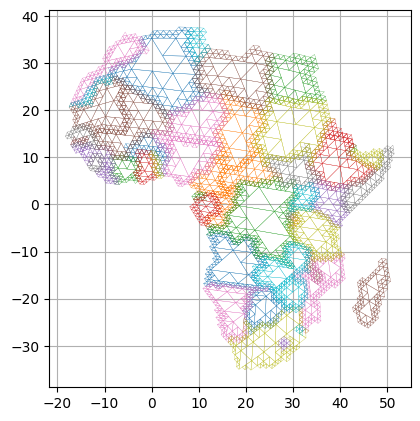

In [18]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
ax.grid(True)

africa.plot(ax=ax, trixels=True, boundary=True, column='name', linewidth=0.2)

### Holes in RSA

In [19]:
rsa = africa[africa.name=='South Africa']

<AxesSubplot:>

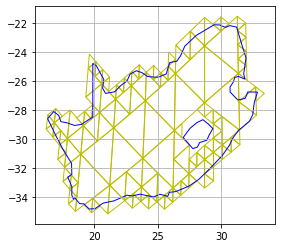

In [20]:
fig, ax = plt.subplots()
ax.grid(True)

rsa.plot(ax=ax, trixels=True, boundary=True, color='y', lw=1, zorder=0)
rsa.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', lw=1, zorder=1)

In [21]:
p = rsa.iloc[0].geometry
interior = starepandas.sids_from_ring(p.interiors[0], level=12, force_ccw=False)

### Puerto Rico (GPKG)

In [22]:
file = '../tests/data/caribbean.gpkg'
gdf = geopandas.read_file(file)

# Sanitation
gdf.rename(columns={'NAME_0': "name"}, inplace=True)
gdf.sort_values(by='name', inplace=True)
gdf.set_index('ISO', inplace=True)
gdf = gdf[['name', 'geometry']]

# Adding simple geom
gdf['geom_simple'] = gdf.simplify(0.001)
gdf.set_geometry('geom_simple', inplace=True)

In [23]:
gdf = gdf[gdf['name']=='Puerto Rico']
sdf = starepandas.STAREDataFrame(gdf)

In [24]:
sids = starepandas.sids_from_gdf(sdf, level=14, force_ccw=True)
sdf.set_sids(sids, inplace=True)

In [25]:
trixels = sdf.make_trixels()
sdf.set_trixels(trixels, inplace=True)

<AxesSubplot:>

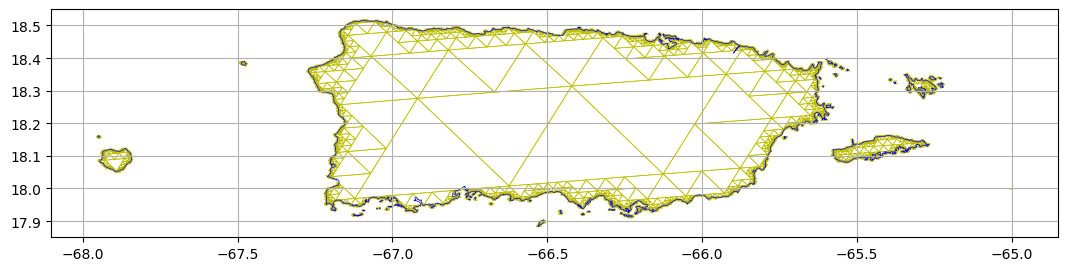

In [26]:
fig, ax = plt.subplots(figsize=(13,5), dpi=100)
ax.grid(True)

sdf.plot(ax=ax, trixels=True, color='y', lw=0.5, zorder=0)
sdf.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', lw=0.5, zorder=1)